<a href="https://colab.research.google.com/github/SainavyaGadde/DataScienceFinalProject/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#Loading the data


In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#save the csv file in google drive location
file_name = '/content/sample_data/household_power_consumption.csv'

# Load the dataset into a Pandas DataFrame.
df = pd.read_csv(file_name, na_values = ['nan','?'])

In [ ]:
# check the sample
df.sample(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
840159,22/7/2008,4:03:00,0.330,0.23,238.37,1.6,0.0,1.0,0.0
495267,25/11/2007,15:51:00,0.222,0.00,243.68,1.0,0.0,0.0,0.0
33455,8/1/2007,22:59:00,0.274,0.10,244.71,1.2,0.0,0.0,0.0
350522,17/8/2007,3:26:00,0.120,0.00,240.69,0.6,0.0,0.0,0.0


In [ ]:
# check size of data
df.shape

(1048575, 9)

In [ ]:
# check data types
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


#Data Preprocessing

In [ ]:
# check na
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,4069
Global_reactive_power,4069
Voltage,4069
Global_intensity,4069
Sub_metering_1,4069
Sub_metering_2,4069
Sub_metering_3,4069


In [ ]:
# percentage of na
df.isna().sum()/df.shape[0]

,0
Date,0.000000
Time,0.000000
Global_active_power,0.003881
Global_reactive_power,0.003881
Voltage,0.003881
Global_intensity,0.003881
Sub_metering_1,0.003881
Sub_metering_2,0.003881
Sub_metering_3,0.003881


In [ ]:
# check the na values
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1043669,10/12/2008,11:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043670,10/12/2008,11:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043671,10/12/2008,11:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043672,10/12/2008,11:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop all nans
df.dropna(inplace=True)

In [ ]:
# check if there are other nas
df.isna().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,False


In [ ]:
# check data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044506 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1044506 non-null  object 
 1   Time                   1044506 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1044506 non-null  float64
 6   Sub_metering_1         1044506 non-null  float64
 7   Sub_metering_2         1044506 non-null  float64
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7), object(2)
memory usage: 79.7+ MB


In [ ]:
# check data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1044506.0,1.108202,1.129546,0.076,0.288,0.550,1.544,10.67
Global_reactive_power,1044506.0,0.118273,0.109506,0.000,0.000,0.098,0.186,1.39
Voltage,1044506.0,239.959803,3.284504,223.490,237.970,240.210,242.140,252.14
Global_intensity,1044506.0,4.718123,4.763588,0.200,1.200,2.400,6.400,46.40
Sub_metering_1,1044506.0,1.177451,6.321183,0.000,0.000,0.000,0.000,80.00
Sub_metering_2,1044506.0,1.475177,6.352703,0.000,0.000,0.000,1.000,78.00
Sub_metering_3,1044506.0,5.933837,8.210398,0.000,0.000,0.000,17.000,31.00


### **Data Information Observations**

The dataset contains information on household energy consumption, with a total of **1,048,575 records** and **9 columns**. Below are the key observations based on the dataset overview and summary statistics:

#### **General Information**
- **Total Rows**: 1,048,575
- **Total Columns**: 9
- **Memory Usage**: Approximately 72.0 MB
- **Column Types**:
  - **Numerical**: 7 columns (`float64`)
  - **Categorical (Object)**: 2 columns (`Date`, `Time`)

The table below summarizes the attributes information available in the dataset

| **Attribute**        | **Description**                                                                                                                       | **Type**            |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------|---------------------|
| `Date`               | Date in format `dd/mm/yyyy`.                                                                                                         | String / Date       |
| `time`               | Time in format `hh:mm:ss`.                                                                                                           | String / Time       |
| `globalactivepower`  | Household global minute-averaged active power (in kilowatt).                                                                         | Numerical (float)   |
| `globalreactivepower`| Household global minute-averaged reactive power (in kilowatt).                                                                       | Numerical (float)   |
| `voltage`            | Minute-averaged voltage (in volt).                                                                                                   | Numerical (float)   |
| `global_intensity`   | Household global minute-averaged current intensity (in ampere).                                                                      | Numerical (float)   |
| `submetering1`       | Energy sub-metering No. 1 (in watt-hour of active energy). Corresponds to the **kitchen**, mainly a dishwasher, oven, and microwave. | Numerical (float)   |
| `submetering2`       | Energy sub-metering No. 2 (in watt-hour of active energy). Corresponds to the **laundry room**, e.g., washing machine, fridge, light. | Numerical (float)   |
| `submetering3`       | Energy sub-metering No. 3 (in watt-hour of active energy). Corresponds to **electric water-heater** and **air-conditioner**.         | Numerical (float)   |

#### **Missing Data**
- Approximately **0.3881%** of the rows in the numerical columns have missing values.
- The columns affected by missing values include:
  - `Global_active_power`
  - `Global_reactive_power`
  - `Voltage`
  - `Global_intensity`
  - `Sub_metering_1`
  - `Sub_metering_2`
  - `Sub_metering_3`

#### **Summary Statistics of Numerical Columns**

1. **Energy Consumption Distribution**:
   - The average household global active power (`Global_active_power`) is **1.108 kW**, with a maximum value of **10.67 kW**.
   - Reactive power (`Global_reactive_power`) is relatively low, averaging **0.118 kW**.
2. **Voltage Stability**:
   - Voltage values are relatively stable, with an average of **239.96 volts** and a standard deviation of **3.285 volts**.
3. **Energy Intensity**:
   - Household global intensity (`Global_intensity`) has a wide range, from **0.2 amperes** to a peak of **46.4 amperes**.
4. **Sub-metering Insights**:
   - Sub-metering values for different areas (kitchen, laundry room, and water heater/air-conditioner) indicate variations in energy usage across household zones, with sub-metering 3 having the highest average consumption (**5.934 watt-hour**).


The dataset provides a rich set of features for analyzing and predicting household energy consumption patterns. Addressing missing data and normalizing numerical features will be essential steps in the preprocessing phase to ensure model accuracy and reliability.

In [ ]:
# Convert Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format="%d/%m/%Y %H:%M:%S")

In [ ]:
# Drop the date and Time column since we can get them on column created
df.drop(columns=["Date", "Time"], inplace=True)

#Feature Engineering

In [ ]:
# create some additional data
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofyear"] = df["datetime"].dt.dayofyear
df["dayname"] = df["datetime"].dt.day_name()


In [ ]:
# for the purpose of analysis, create year-month column from datetime
df["year_month"] = df["datetime"].dt.strftime("%Y-%b")

In [ ]:
# check sample
df.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
15328,2.528,0.080,240.48,10.4,0.0,0.0,17.0,2006-12-27 08:52:00,12,2006,27,8,361,Wednesday,2006-Dec
705705,1.714,0.186,236.66,7.4,0.0,2.0,17.0,2008-04-19 19:09:00,4,2008,19,19,110,Saturday,2008-Apr
290142,0.130,0.000,241.42,0.6,0.0,0.0,0.0,2007-07-06 05:06:00,7,2007,6,5,187,Friday,2007-Jul
7800,0.318,0.140,247.22,1.4,0.0,1.0,0.0,2006-12-22 03:24:00,12,2006,22,3,356,Friday,2006-Dec


In [ ]:
# check the max between date ranges to obrserve when it starts and ends
df["datetime"].min(), df["datetime"].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2008-12-13 21:38:00'))

In [ ]:
data = df.copy()

data = data.sort_values(by="year_month").reset_index(drop=True)

In [ ]:
# data.sort_values(by='year_month')

#Monthly Trends

In [ ]:
# data
def plot_monthly_data(meaned_data, title, color, col, subplot_position):
    plt.subplot(subplot_position)
    meaned_data.index = pd.to_datetime(meaned_data.index, format='%Y-%b')
    meaned_data_sorted = meaned_data.sort_index()
    meaned_data_sorted.index = meaned_data_sorted.index.strftime('%Y-%b')
    meaned_data_sorted.plot(kind='line', color=color, marker='o')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=range(len(meaned_data_sorted)), labels=meaned_data_sorted.index, rotation=45, fontsize=10)


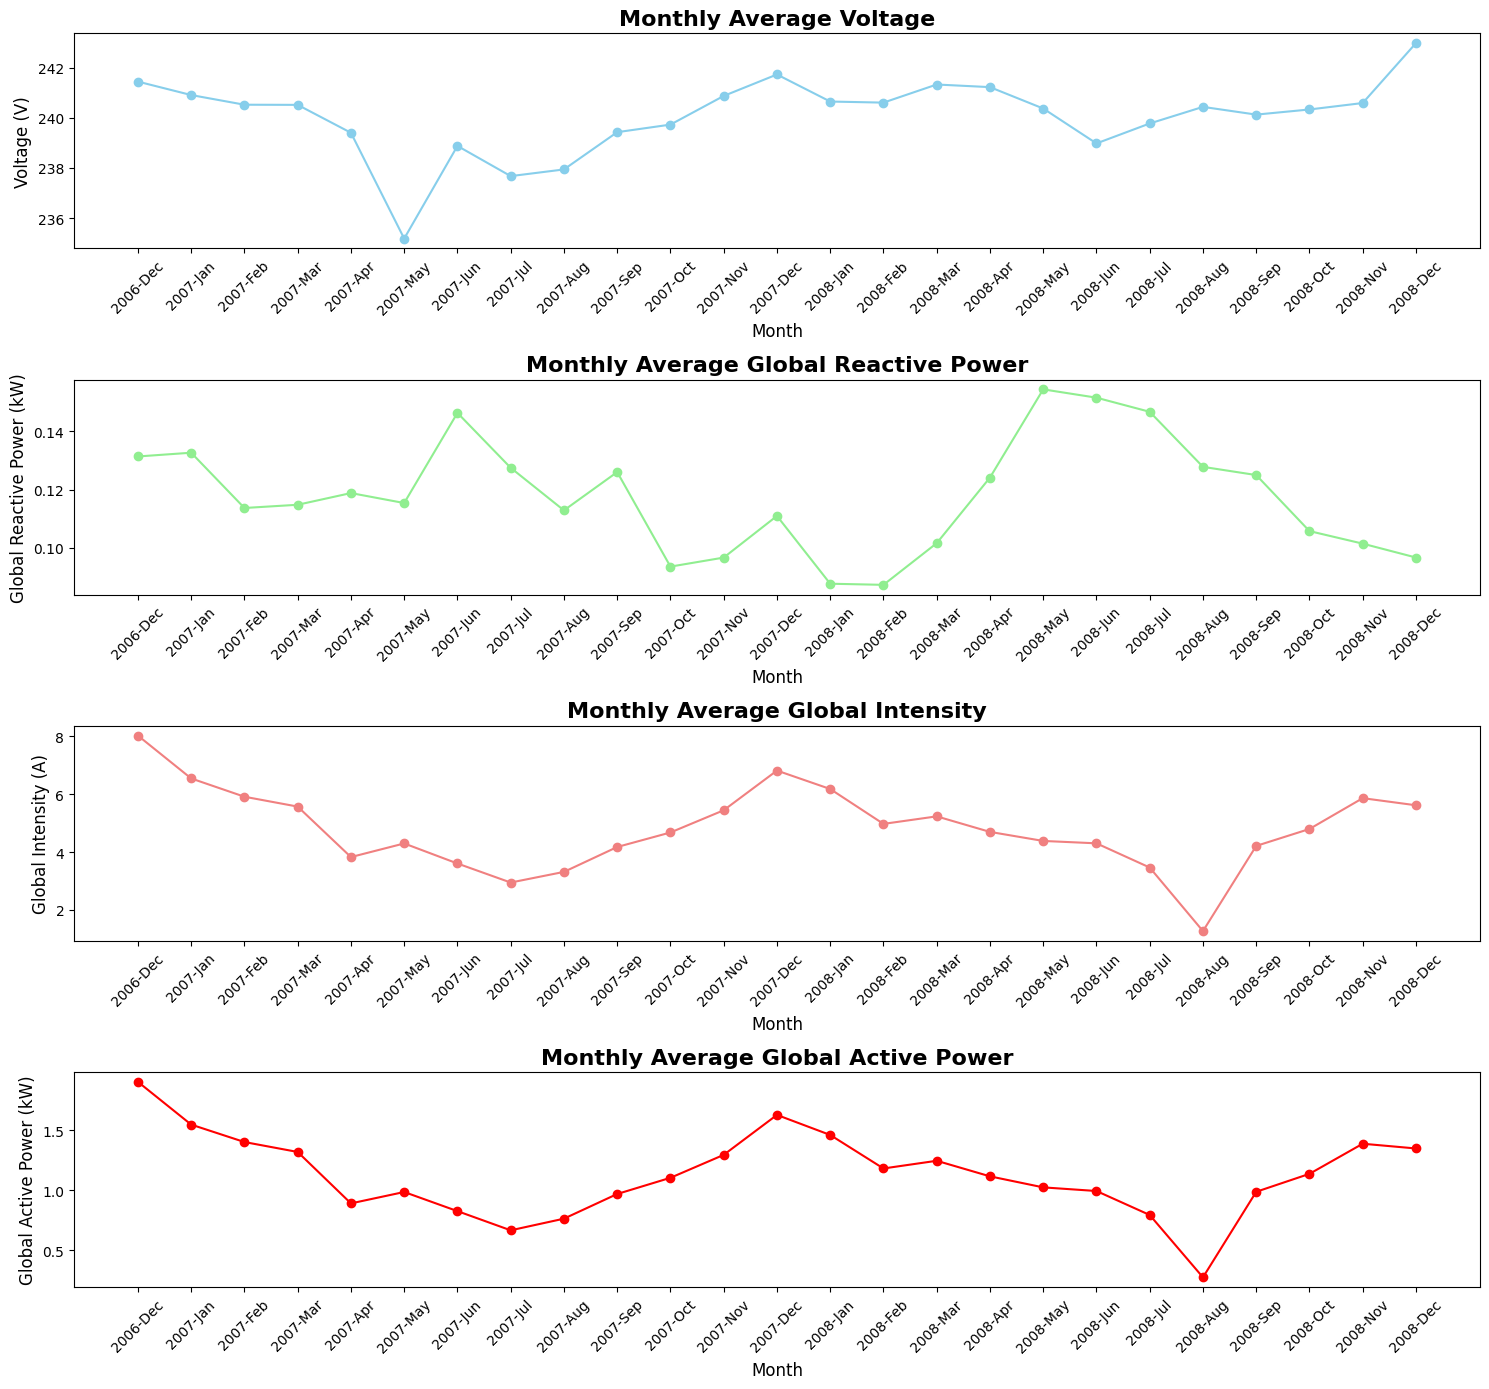

In [ ]:
# lets plot usage Information: VOltage, Active Power, Reactive Power, Intensity for monthly trends
plt.figure(figsize=(15, 14))
monthly_voltage = data.groupby('year_month')['Voltage'].mean()
plot_monthly_data(
    meaned_data=monthly_voltage,
    col='Voltage (V)',
    title='Monthly Average Voltage',
    color='skyblue',
    subplot_position=411
)

monthly_reactive_power = data.groupby('year_month')['Global_reactive_power'].mean()
plot_monthly_data(
    meaned_data=monthly_reactive_power,
    col='Global Reactive Power (kW)',
    title='Monthly Average Global Reactive Power',
    color='lightgreen',
    subplot_position=412
)

# Plot Global Intensity
monthly_intensity = data.groupby('year_month')['Global_intensity'].mean()
plot_monthly_data(
    meaned_data=monthly_intensity,
    col='Global Intensity (A)',
    title='Monthly Average Global Intensity',
    color='lightcoral',
    subplot_position=413
)

# Plot Global Active Power
monthly_active_power = data.groupby('year_month')['Global_active_power'].mean()
plot_monthly_data(
    meaned_data=monthly_active_power,
    col='Global Active Power (kW)',
    title='Monthly Average Global Active Power',
    color='red',
    subplot_position=414
)

plt.tight_layout()
plt.show()

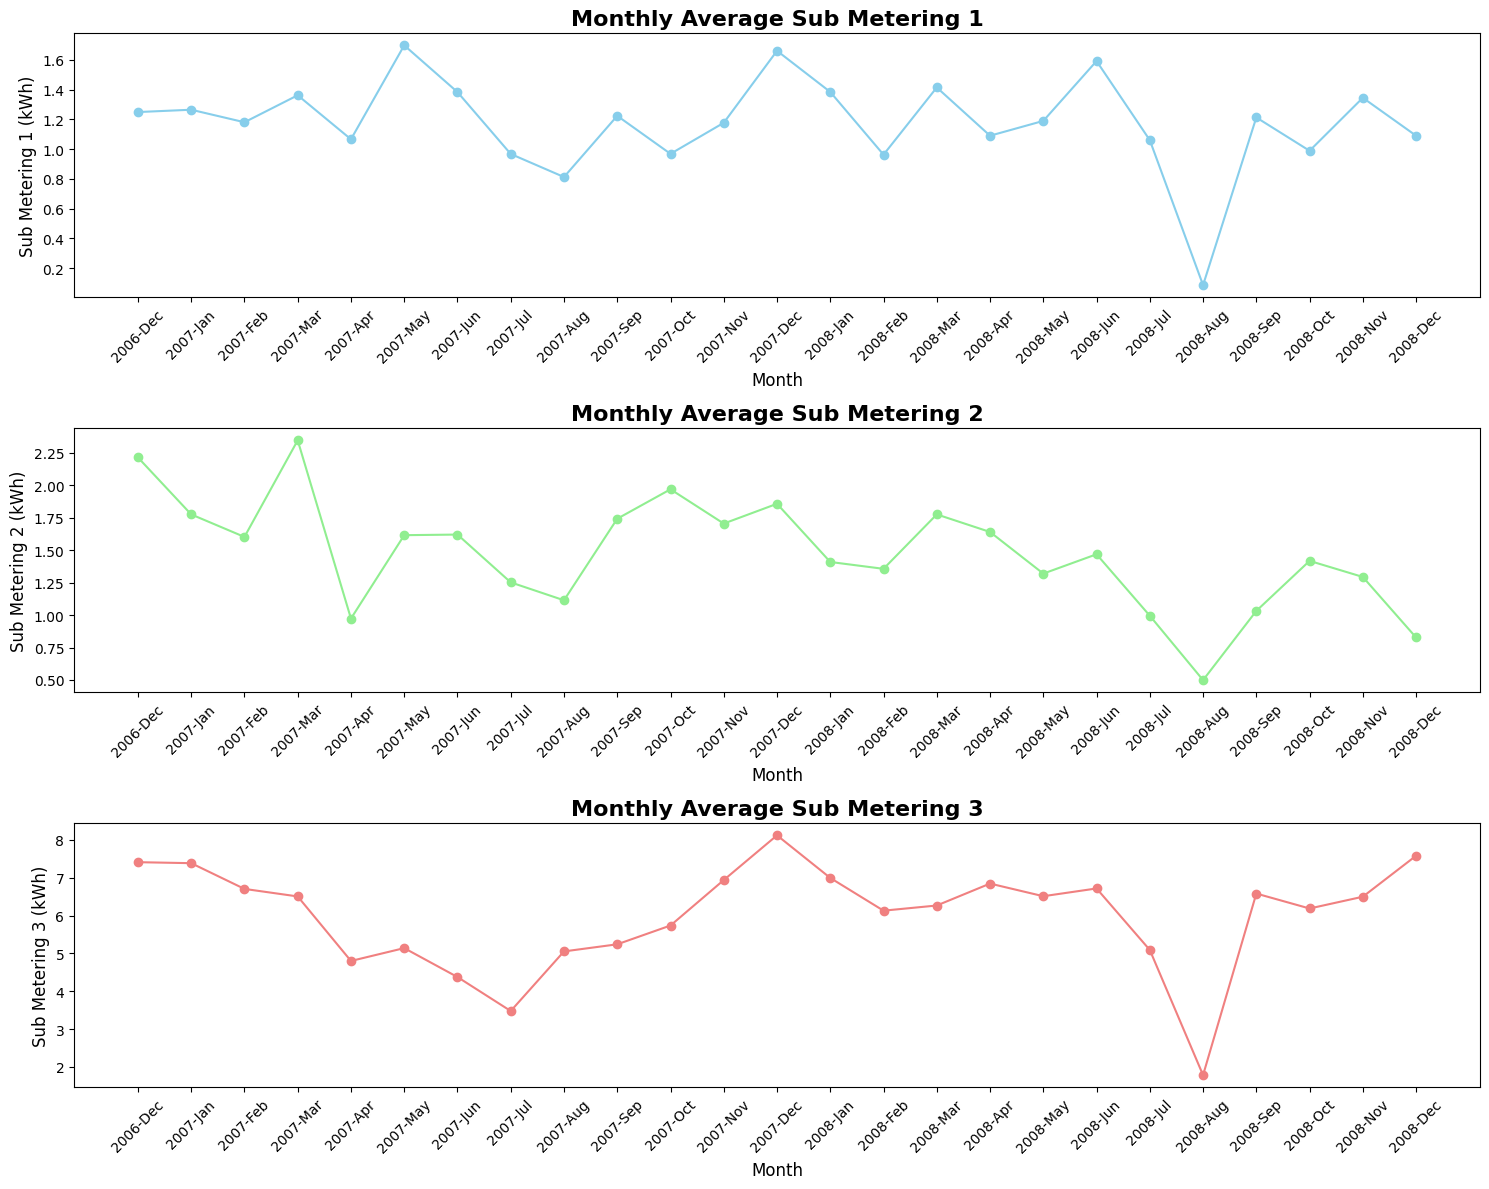

In [ ]:
# do the samle for SUB METERS
plt.figure(figsize=(15, 12))

# Sub_metering_1
Sub_metering_1 = data.groupby('year_month')['Sub_metering_1'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_1,
    col='Sub Metering 1 (kWh)',
    title='Monthly Average Sub Metering 1',
    color='skyblue',
    subplot_position=311
)

# Sub_metering_2
Sub_metering_2 = data.groupby('year_month')['Sub_metering_2'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_2,
    col='Sub Metering 2 (kWh)',
    title='Monthly Average Sub Metering 2',
    color='lightgreen',
    subplot_position=312
)

# Sub_metering_3
Sub_metering_3 = data.groupby('year_month')['Sub_metering_3'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_3,
    col='Sub Metering 3 (kWh)',
    title='Monthly Average Sub Metering 3',
    color='lightcoral',
    subplot_position=313
)
plt.tight_layout()
plt.show()

#Hourly Trends

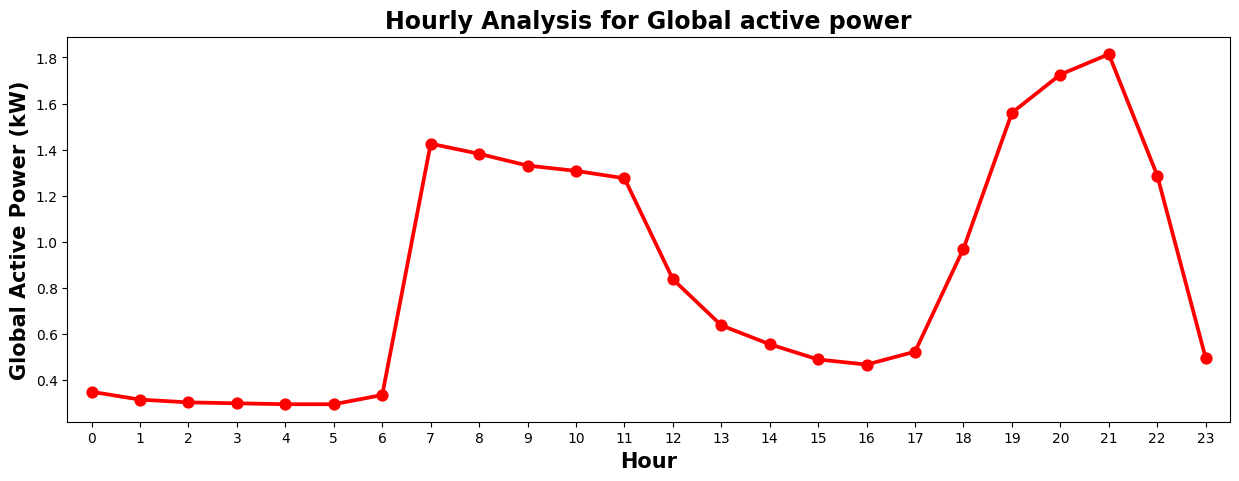

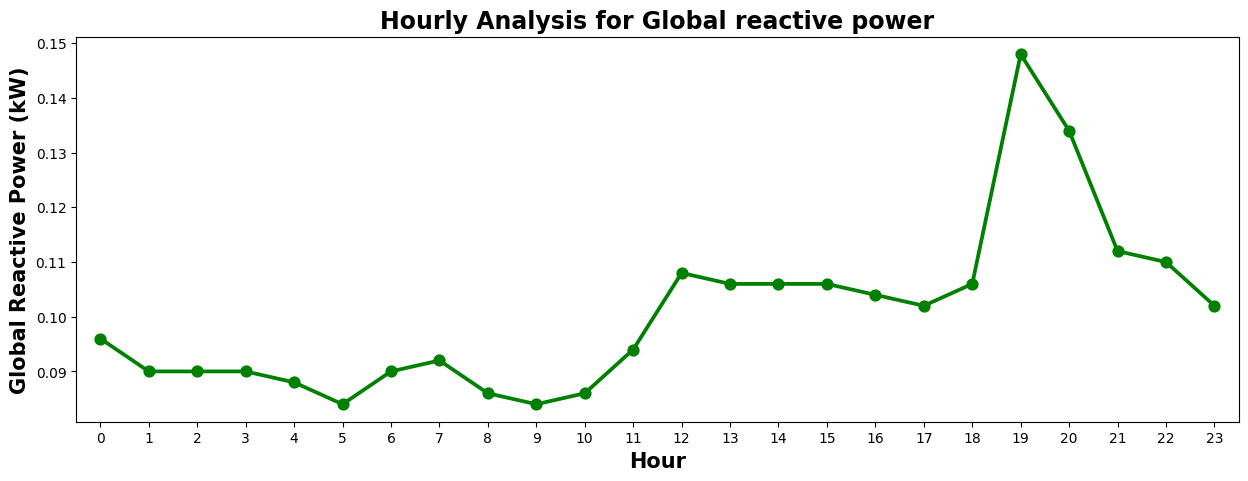

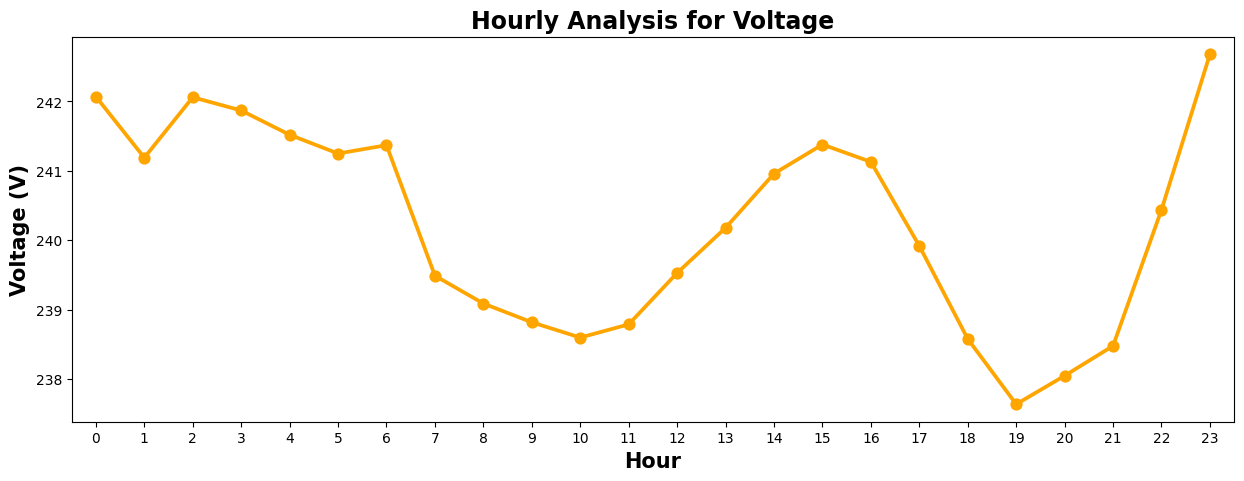

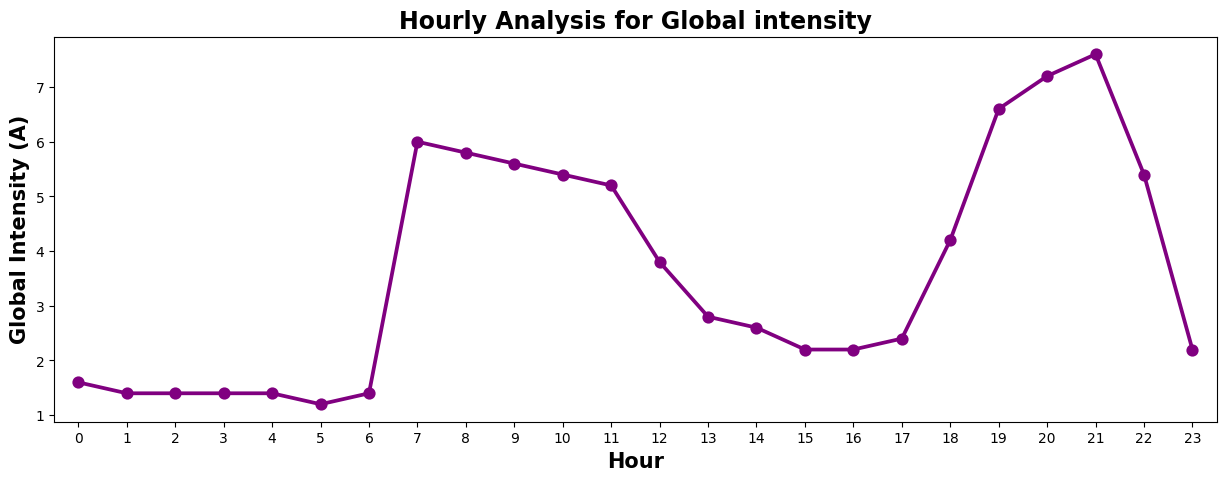

In [ ]:
# do hour analysis of the energies
colors = ['red', 'green', 'orange', 'purple', 'yellow', 'blue', 'cyan', 'magenta', 'gray', 'brown']
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
y_labels = [
    'Global Active Power (kW)',
    'Global Reactive Power (kW)',
    'Voltage (V)',
    'Global Intensity (A)'
]

# create plots by medianed hour
for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=False)
    )
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )

    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


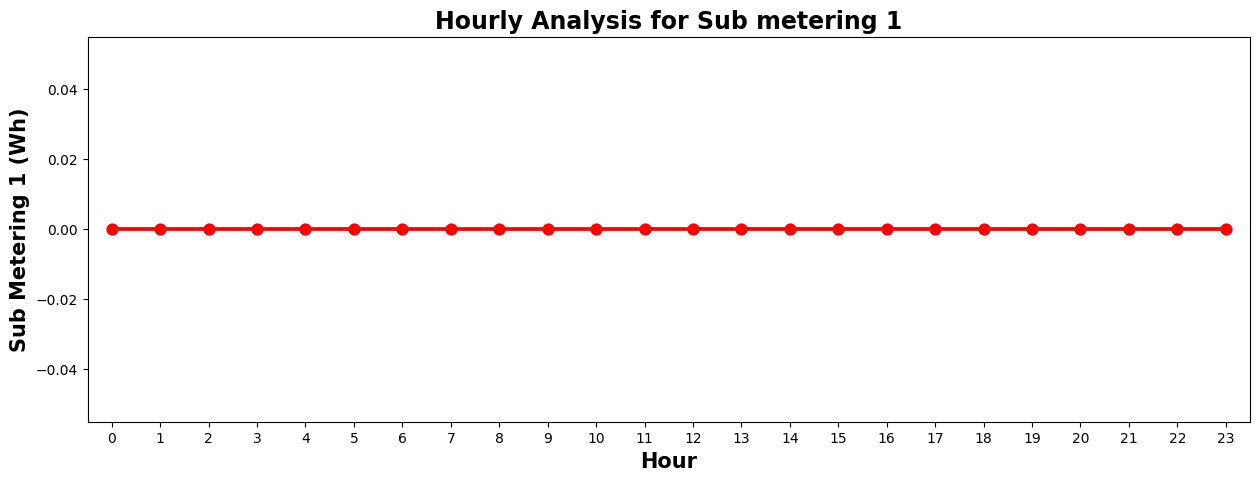

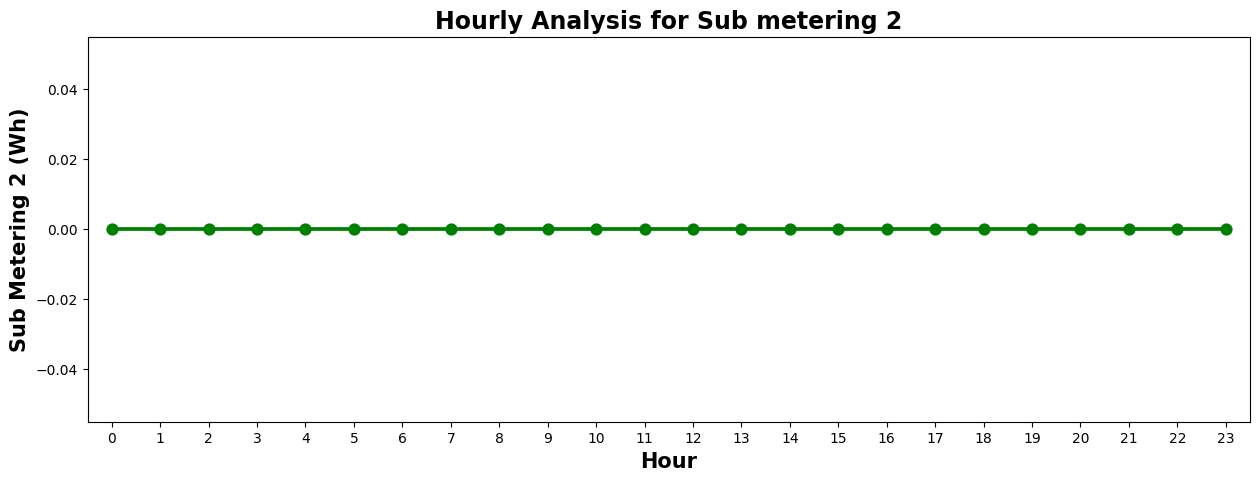

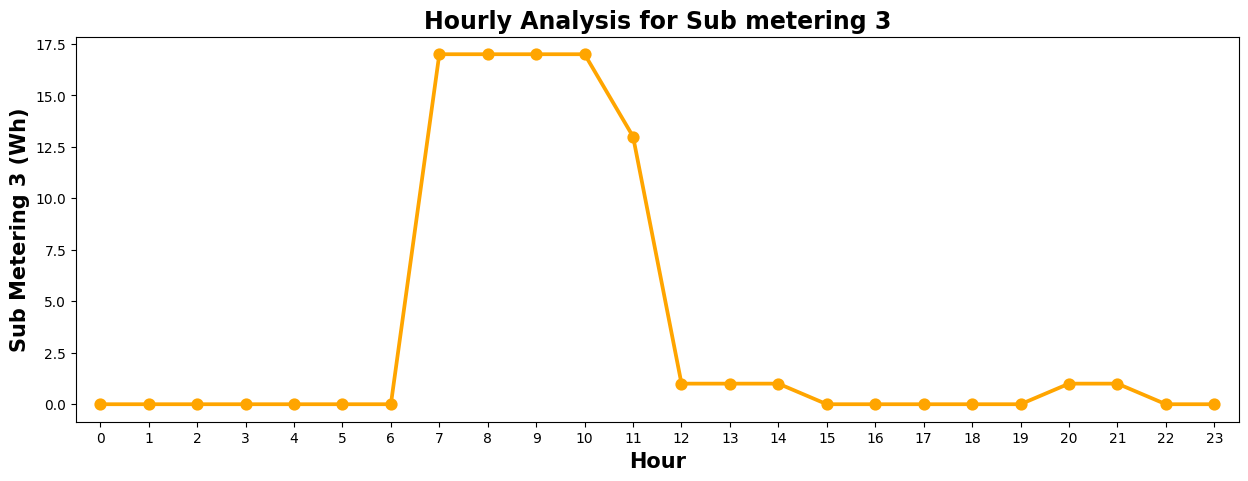

In [ ]:
# BY sub meters
# cols for analysis (Sub_metering_1, Sub_metering_2, Sub_metering_3)
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

y_labels = [
    'Sub Metering 1 (Wh)',
    'Sub Metering 2 (Wh)',
    'Sub Metering 3 (Wh)'
]

for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=True)
    )

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )
    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime', 'month', 'year', 'day', 'hour',
       'dayofyear', 'dayname', 'year_month'],
      dtype='object')

#Weekly Trends

In [ ]:
# create the order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


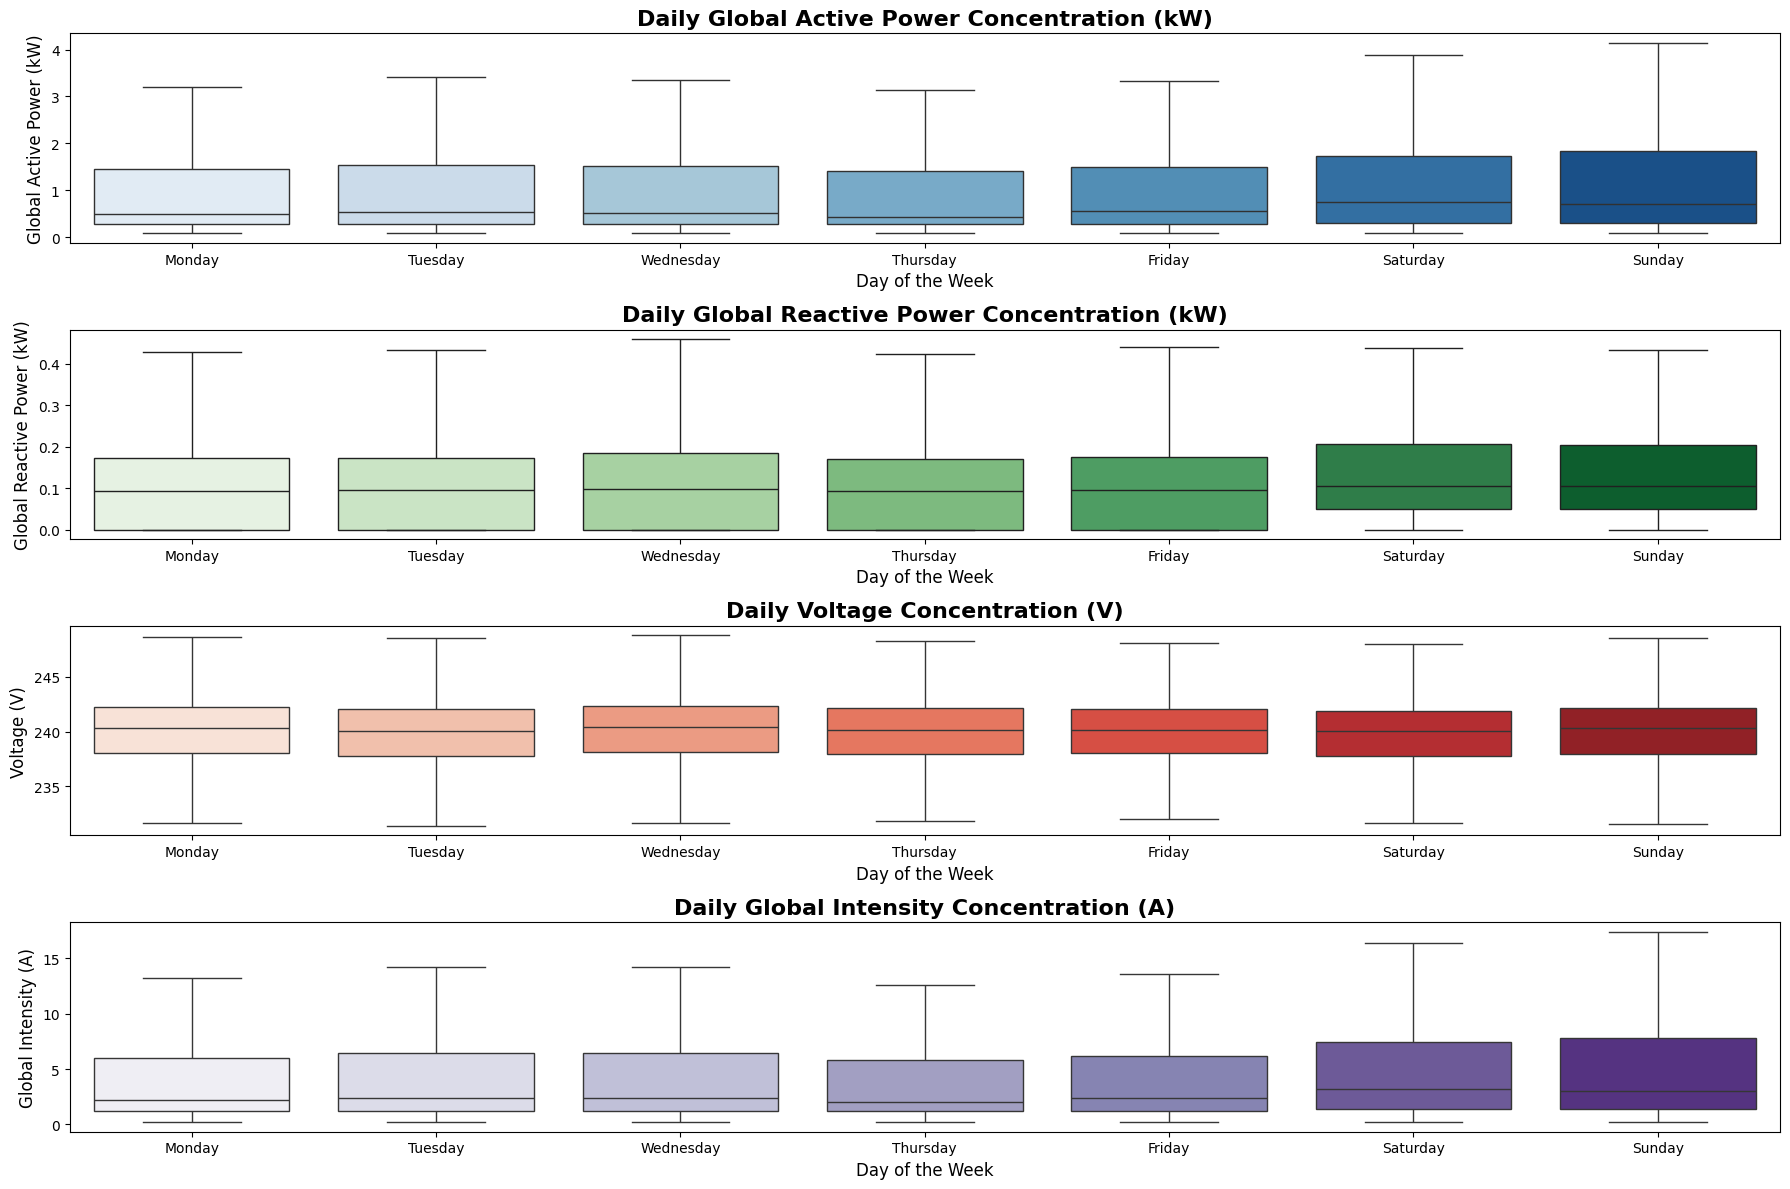

In [ ]:
plt.figure(figsize=(18, 12))

# Global Active Power plot
plt.subplot(4, 1, 1)
sns.boxplot(x='dayname', y='Global_active_power', data=data, palette='Blues', showfliers=False, order=weekday_order)
plt.title('Daily Global Active Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)

# Global Reactive Power plot
plt.subplot(4, 1, 2)
sns.boxplot(x='dayname', y='Global_reactive_power', data=data, palette='Greens', showfliers=False, order=weekday_order)
plt.title('Daily Global Reactive Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Reactive Power (kW)', fontsize=12)

# Voltage plot
plt.subplot(4, 1, 3)
sns.boxplot(x='dayname', y='Voltage', data=data, palette='Reds', showfliers=False, order=weekday_order)
plt.title('Daily Voltage Concentration (V)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)

# Global Intensity plot
plt.subplot(4, 1, 4)
sns.boxplot(x='dayname', y='Global_intensity', data=data, palette='Purples', showfliers=False, order=weekday_order)
plt.title('Daily Global Intensity Concentration (A)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Intensity (A)', fontsize=12)

plt.tight_layout()
plt.show()


#Daily Trends

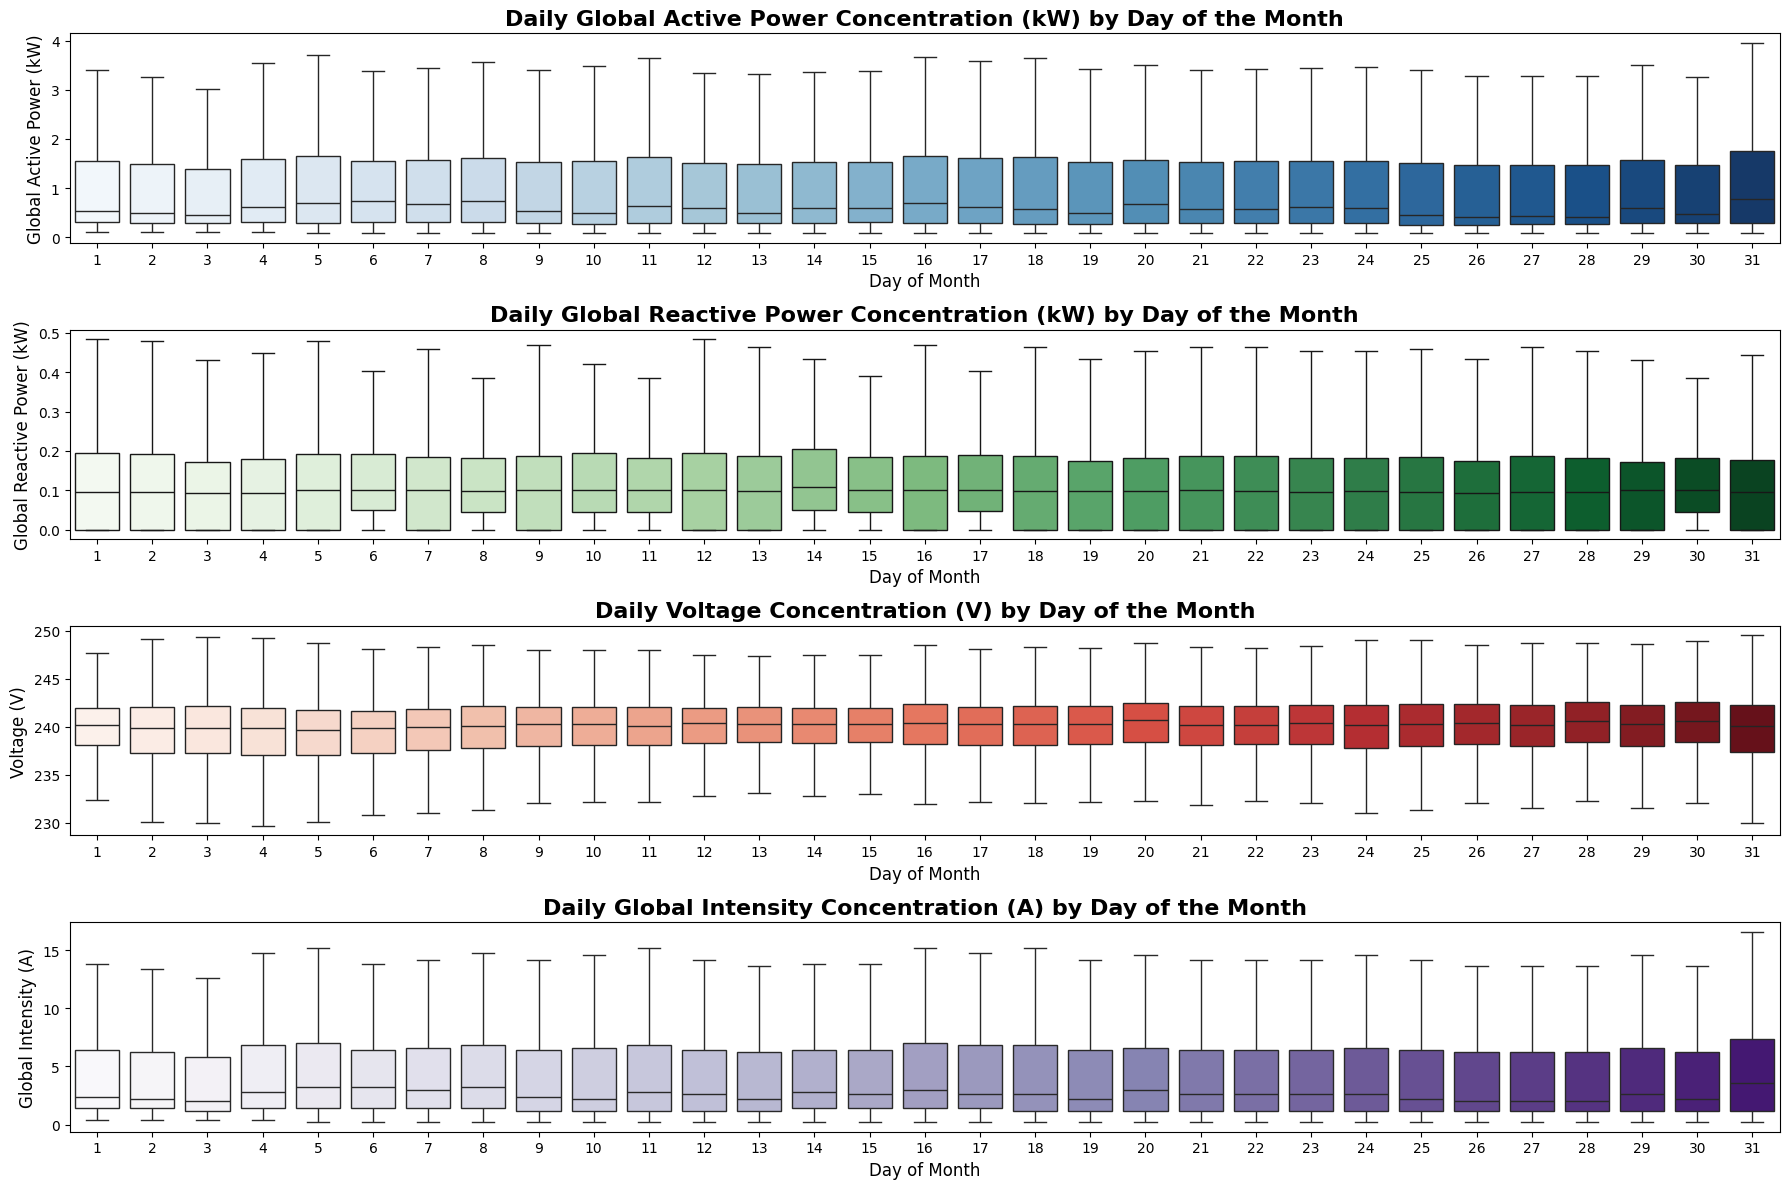

In [ ]:
# grouping bu date of month
def plot_boxplot_by_group(data, group_col, y_col, title, palette, ylabel):
    sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()

# Boxplots for day of the month (day) - grouped by day of the month
plt.figure(figsize=(18, 12))
plt.subplot(4, 1, 1)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_active_power',
    title='Daily Global Active Power Concentration (kW) by Day of the Month',
    palette='Blues',
    ylabel='Global Active Power (kW)'
)
plt.subplot(4, 1, 2)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_reactive_power',
    title='Daily Global Reactive Power Concentration (kW) by Day of the Month',
    palette='Greens',
    ylabel='Global Reactive Power (kW)'
)
plt.subplot(4, 1, 3)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Voltage',
    title='Daily Voltage Concentration (V) by Day of the Month',
    palette='Reds',
    ylabel='Voltage (V)'
)
plt.subplot(4, 1, 4)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_intensity',
    title='Daily Global Intensity Concentration (A) by Day of the Month',
    palette='Purples',
    ylabel='Global Intensity (A)'
)

plt.tight_layout()
plt.show()

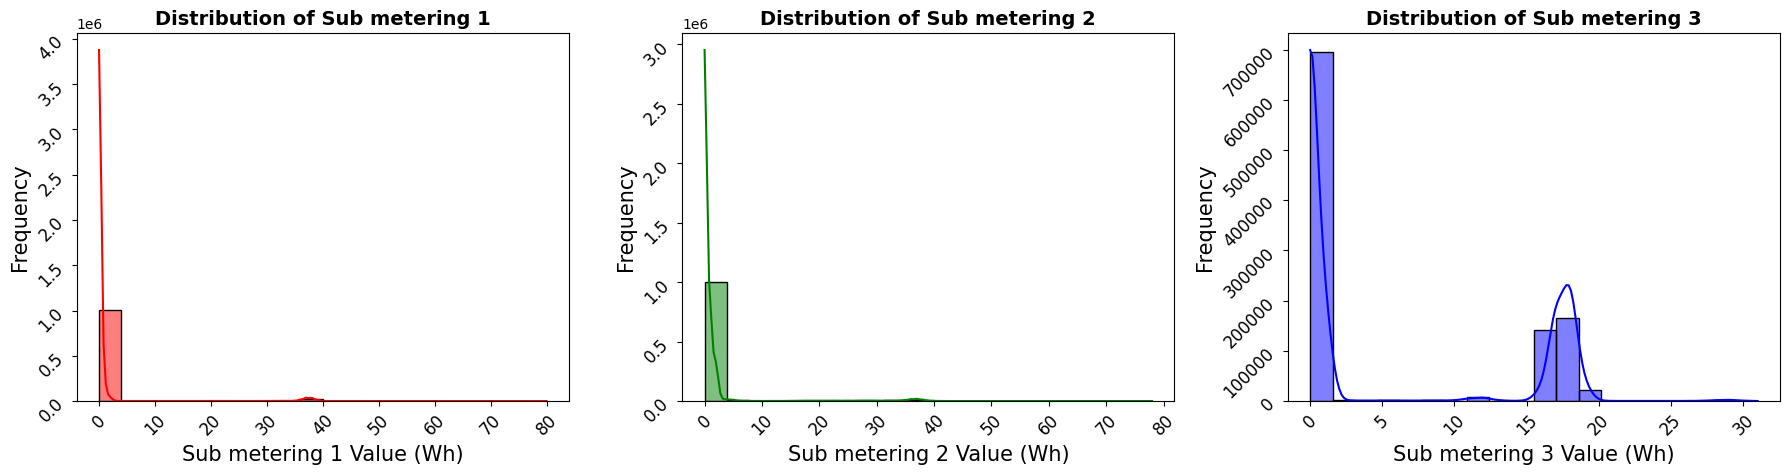

In [ ]:
# distribution of usages
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
colors = ['red', 'green', 'blue']
plt.figure(figsize=(18, 5))
# for each sub meters
for i, column in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data[column], kde=True, color=colors[i % len(colors)], bins=20)

    plt.title(f'Distribution of {column.replace("_", " ").capitalize()}', fontweight='bold', fontsize=14)
    plt.xlabel(f'{column.replace("_", " ").capitalize()} Value (Wh)', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12, rotation=45)
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

#### Observation
- The histograms shows that;
1. Sub-metering 1 shows a right-skewed distribution with a majority of values concentrated around 0 Wh and a few higher values.
2. Sub-metering 2 has a similar pattern, but with a slightly wider spread
3. Sub-metering 3 exhibits a bimodal distribution with distinct peaks around 10 Wh and 20 Wh, suggesting two different usage patterns.

- In general, the data suggests varying usage patterns across the three sub-meters, with Sub-metering 3 showing the most diverse behavior.

In [ ]:
# select numerical columns
# We exlude the TIME BASED VARIABLES
df_num = df.select_dtypes(include=["float", "int"]).drop(columns=["year", "dayofyear","month"])
df_num.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,17


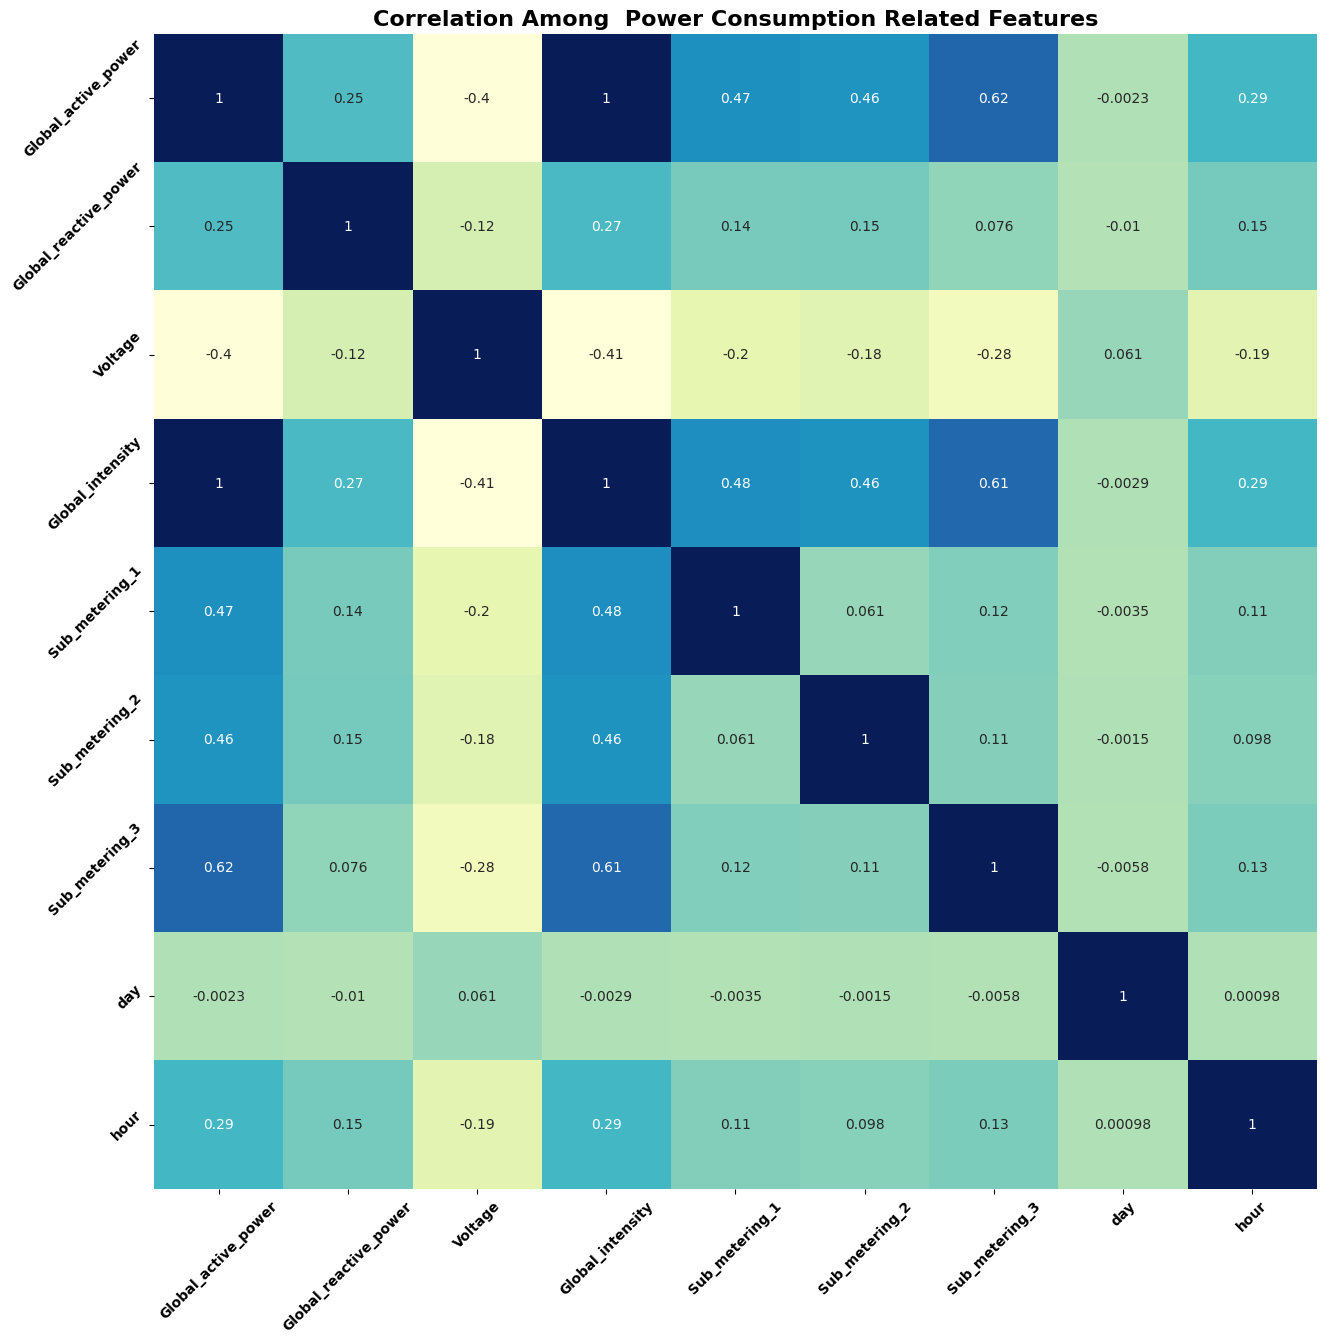

In [ ]:
# plot corrrelation analysis
plt.figure(figsize=(15,15))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Correlation Among  Power Consumption Related Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=45, fontweight='bold')
plt.show()

In [ ]:
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
Global_active_power,1.000000,0.254841,-0.400987,0.999020,0.474129,0.456677,0.624107,-0.002291,0.285043
Global_reactive_power,0.254841,1.000000,-0.120617,0.271843,0.137682,0.150528,0.076274,-0.010067,0.146362
Voltage,-0.400987,-0.120617,1.000000,-0.411298,-0.203805,-0.178899,-0.284932,0.060809,-0.190201
Global_intensity,0.999020,0.271843,-0.411298,1.000000,0.478198,0.462192,0.613220,-0.002902,0.285852
Sub_metering_1,0.474129,0.137682,-0.203805,0.478198,1.000000,0.060830,0.115600,-0.003514,0.110560
Sub_metering_2,0.456677,0.150528,-0.178899,0.462192,0.060830,1.000000,0.106461,-0.001452,0.097508
Sub_metering_3,0.624107,0.076274,-0.284932,0.613220,0.115600,0.106461,1.000000,-0.005774,0.127895
day,-0.002291,-0.010067,0.060809,-0.002902,-0.003514,-0.001452,-0.005774,1.000000,0.000984
hour,0.285043,0.146362,-0.190201,0.285852,0.110560,0.097508,0.127895,0.000984,1.000000


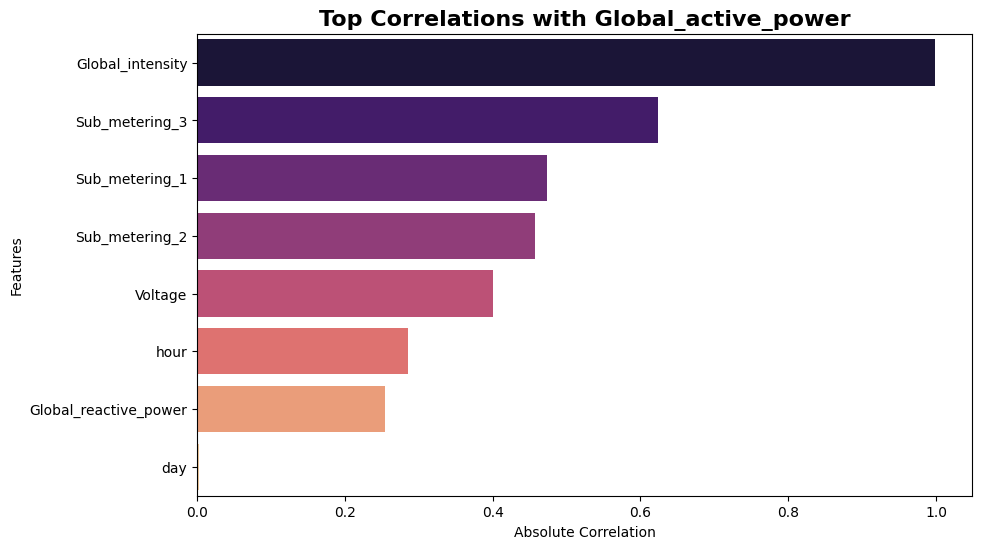

In [ ]:
# get correlation with Global_active_power

# extract the Global_active_power column and sort the correlations
Global_active_power = corr['Global_active_power'].abs().sort_values(ascending=False)
# remove the first since is stroke itself
top_corr = Global_active_power.index[1:]

# a bar chart show the results
plt.figure(figsize=(10, 6))
sns.barplot(x=Global_active_power[top_corr], y=top_corr, palette='magma')
plt.title('Top Correlations with Global_active_power', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')

plt.show()

### **Machine Learning Approach**

The approach for machine learning will involve training and evaluating models such as **LSTM**, **GRU**, and **RNN**, which are well-suited for time-series data due to their ability to capture temporal dependencies. The following are some of the models to be used;
    - **LSTM (Long Short-Term Memory)**: Effective for capturing long-term dependencies.
    - **GRU (Gated Recurrent Unit)**: Computationally efficient and capable of learning temporal patterns.
    - **RNN (Recurrent Neural Network)**: for deeper understanding of sequential.
    - **MLP model**: To be used as a baseline for comparison with recurrent one
    - **Hybrid Model**: A combination of RNN, GRU and LSTM to observe how they perfoms when combined.


#### **Performance Metrics**
To evaluate the models' performance, we will track their **epoch-wise performance** using the following metrics:

1. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between predicted and actual values.
   - A lower MSE indicates better model performance.
   - Formula:  
     \[$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     \$]

2. **Root Mean Squared Error (RMSE)**:
   - The square root of MSE, providing error in the same units as the target variable.
   - RMSE is more interpretable for practical applications as it penalizes larger errors more significantly.
   - Formula:  
     \[$
     \text{RMSE} = \sqrt{\text{MSE}}
     \$]


3. **Training Configuration**:
   - Use a train-validation split to monitor performance during training.
   - Track **MSE** and **RMSE** after each epoch to visualize learning progress and identify potential overfitting or underfitting.

The machine learning models will provide predictions for household energy consumption patterns, and their performance will be compared using **MSE** and **RMSE**. By visualizing these metrics over epochs, we aim to ensure robust model training and select the best-performing algorithm for deployment in energy-efficient smart home systems.

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,12,2006,16,17,350,Saturday,2006-Dec
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,12,2006,16,17,350,Saturday,2006-Dec
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,12,2006,16,17,350,Saturday,2006-Dec
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,12,2006,16,17,350,Saturday,2006-Dec
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,12,2006,16,17,350,Saturday,2006-Dec


In [ ]:
import random
def set_reproducibility(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"Reproducibility set with seed {seed}")

set_reproducibility(seed=42)


Reproducibility set with seed 42


A breakdown of the fields in relation to your objectives and recommendations for refinement:

1. **Selected Features:**
   - **Global_reactive_power**: it has reactive power in the electrical system.
   - **Voltage**: Variations in voltage can affect power usage and appliance behavior, making it a relevant feature.
   - **Global_intensity**: it represents the current intensity in the electrical system and directly correlates with energy consumption.
   - **Sub_metering_1, Sub_metering_2, Sub_metering_3**: Sub-metering data provides granular insights into energy usage by different parts of the household, such as kitchen, laundry, etc.
   - **day**: The day of the week can capture periodic patterns (i.e, weekends vs. weekdays).
   - **hour**: The hour of the day captures diurnal patterns, such as peak usage during mornings and evenings.

2. **Target Variable:**
   - **Global_active_power**: Represents the total active power consumed by the household.

---


In [ ]:
# we select only the columns above since they seems to have information about global power
COLUMNS = [
    'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3', 'day', 'hour'
]

TARGET = "Global_active_power"

In [ ]:
# unique dates.
df["datetime"] = df["datetime"].astype("str").str.split(" ").str.get(0)

In [ ]:
df = df.groupby("datetime")[COLUMNS+[TARGET]].mean().reset_index(drop=True)
df.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour,Global_active_power
0,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,16.0,20.181818,3.053475
1,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,17.0,11.500000,2.354486
2,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,18.0,11.500000,1.530435
3,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,19.0,11.500000,1.157079
4,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972,20.0,11.500000,1.545658


In [ ]:
df.shape

(728, 9)

In [ ]:

# ftn to create time steps
def create_time_steps(data, target, time_steps):
    """
    converts the df into sequences for time-series prediction.

    :param data: DataFrame containing features.
    :param target: Series containing the target variable.
    :param time_steps: Number of previous time steps to consider for prediction.
    :return: X, y arrays suitable for time-series modeling.
    """
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps].values)
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

In [ ]:
# define paramss
TIME_STEPS = 7
BATCH_SIZE = 32
EPOCHS = 20
HIDDEN_SIZE = 128
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


<Axes: xlabel='Global_active_power', ylabel='Density'>

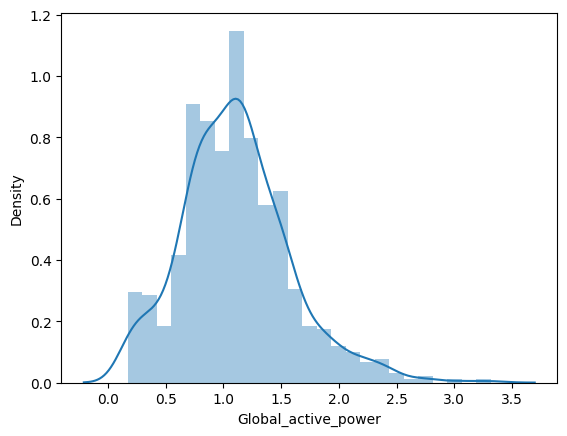

In [ ]:
# check how the target distribution is
sns.distplot(df[TARGET])

<Axes: xlabel='Global_active_power', ylabel='Density'>

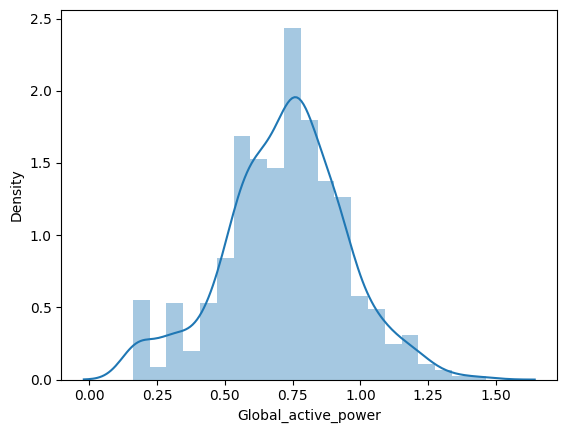

In [ ]:
sns.distplot(np.log1p(df[TARGET]))

In [ ]:
df.head(2)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour,Global_active_power
0,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,16.0,20.181818,3.053475
1,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,17.0,11.500000,2.354486


In [ ]:
df.shape

(728, 9)

In [ ]:
# data scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[COLUMNS])

target_converted = np.log1p(df[TARGET]).values
# convert back to for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=COLUMNS).reset_index(drop=True)


# create sequence data
X, y = create_time_steps(
    data=scaled_df[COLUMNS],
    target=target_converted,
    time_steps=TIME_STEPS
)


In [ ]:
# check the shape
X.shape, y.shape

((721, 7, 8), (721,))

In [ ]:
# split the data into training and testing sets
train_size = int(len(X) * 0.8)
Xtrain, Xtest = X[:train_size], X[train_size:]
ytrain, ytest = y[:train_size], y[train_size:]

In [ ]:
Xtrain[:3][:3][0]

array([[-9.58252531e-01, -1.83014195e+00,  4.22646963e+00,
        -1.04035974e+00, -6.08262780e-02,  2.60680038e+00,
         3.13462022e-02,  1.44933476e+01],
       [ 1.23143238e+00,  7.05987113e-02,  2.66699900e+00,
         2.09250676e-01,  9.21430160e-01,  1.33553764e+00,
         1.44878715e-01, -5.57004839e-03],
       [-1.88612217e-01,  6.36709660e-01,  8.57935929e-01,
        -3.86972688e-01,  2.22732989e-01,  1.52379141e+00,
         2.58411229e-01, -5.57004839e-03],
       [-4.28551855e-01,  1.01634593e+00,  1.01777488e-01,
        -5.24657259e-01,  2.44508970e+00, -6.50998405e-01,
         3.71943742e-01, -5.57004839e-03],
       [-2.06170933e-01,  1.16904257e+00,  8.81043502e-01,
        -1.04035974e+00,  2.34779492e-01,  1.53630458e+00,
         4.85476255e-01, -5.57004839e-03],
       [-5.73963921e-01,  5.42176185e-01,  1.56093486e-01,
         4.60297965e-02,  2.25252993e-01,  5.27601903e-01,
         5.99008769e-01, -4.40869068e-03],
       [ 3.66765116e-01,  6.133930

In [ ]:
Xtest.shape, ytest.shape, Xtrain.shape, ytrain.shape

((145, 7, 8), (145,), (576, 7, 8), (576,))

In [ ]:
# get the data as tensors
Xtrain_tensor = torch.tensor(Xtrain, dtype=torch.float32)
Ytrain_tensor = torch.tensor(ytrain, dtype=torch.float32).unsqueeze(1)
Xtest_tensor = torch.tensor(Xtest, dtype=torch.float32)
Ytest_tensor = torch.tensor(ytest, dtype=torch.float32).unsqueeze(1)

Xtrain_tensor.shape, Ytrain_tensor.shape

(torch.Size([576, 7, 8]), torch.Size([576, 1]))

In [ ]:
# create data loader
train_dataset = TensorDataset(Xtrain_tensor, Ytrain_tensor)
test_dataset = TensorDataset(Xtest_tensor, Ytest_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
def rmse_score(y_true, y_pred):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


In [ ]:
# function to train a model and evaluate
def train_and_evaluate(
    model, train_loader, test_loader, optimizer, criterion, epochs=10, device = DEVICE
):
    """
    Trains and evaluates a PyTorch model.

    Parameters:
    - model: The PyTorch model to train.
    - train_loader: DataLoader for the training set.
    - test_loader: DataLoader for the validation/test set.
    - optimizer: Optimizer to use during training.
    - criterion: Loss function.
    - epochs: Number of training epochs.
    - device: Device to train on ('cpu' or 'cuda').

    Returns:
    - trained_model: The trained model.
    - metrics: Dictionary containing train/validation losses, RMSE, and other metrics.
    """
    model = model.to(device)
    hist = {"train_loss":[], "train_rmse":[], "val_loss":[], "val_rmse":[]}
    for epoch in range(epochs):
        #do the train loop
        model.train()
        train_loss = 0.0
        train_preds = []
        train_actual = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            train_preds.extend(outputs.detach().numpy())
            train_actual.extend(y_batch.squeeze().detach().numpy())
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        rmse_train = rmse_score(train_actual, train_preds)

        # Validation loop
        model.eval()
        val_loss = 0.0
        all_outputs = []
        all_targets = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                all_outputs.append(outputs.cpu())
                all_targets.append(y_batch.cpu())
        val_loss /= len(test_loader)

        # get R² score for validation
        all_outputs = torch.cat(all_outputs).numpy()
        all_targets = torch.cat(all_targets).numpy()
        rmse_val = rmse_score(all_targets, all_outputs)

        hist['train_loss'].append(train_loss)
        hist['train_rmse'].append(rmse_train)
        hist['val_loss'].append(val_loss)
        hist['val_rmse'].append(rmse_val)

        print(f"Epoch {epoch + 1}/{epochs} Train Loss: {train_loss:.5f} Train rmse: {rmse_train:.5f}  Val Loss {val_loss:.5f}  val rmse {rmse_val:.5f}")


    return model, hist


### 1. MLP regressor model (baseline)

In [ ]:
# SIMPLE MLP model
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPRegressor, self).__init__()
        self.hidden_dim = hidden_dim

        # MLP layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # x = x[:, -1, :]
        x = x.mean(dim=1)  # Mean pooling
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [ ]:
EPOCHS = 40
LEARNING_RATE = 0.001

input_dim = 8
hidden_dim = 64
output_dim = 1
n_layers = 8
drop_prob = 0.05


In [ ]:
# define the model
mlp_regressor = MLPRegressor(input_dim, hidden_dim, output_dim)

In [ ]:
mlp_regressor

MLPRegressor(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(mlp_regressor.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

In [ ]:
# Train MPL and evaluate

trained_mlp_model, mlp_metrics = train_and_evaluate(
    mlp_regressor, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)

Epoch 1/40 Train Loss: 0.77410 Train rmse: 0.89500  Val Loss 0.47378  val rmse 0.62076
Epoch 2/40 Train Loss: 0.37693 Train rmse: 0.64006  Val Loss 0.28633  val rmse 0.44827
Epoch 3/40 Train Loss: 0.17126 Train rmse: 0.45094  Val Loss 0.23641  val rmse 0.42468
Epoch 4/40 Train Loss: 0.12311 Train rmse: 0.37337  Val Loss 0.15249  val rmse 0.36070
Epoch 5/40 Train Loss: 0.10992 Train rmse: 0.31387  Val Loss 0.12041  val rmse 0.33303
Epoch 6/40 Train Loss: 0.10877 Train rmse: 0.31847  Val Loss 0.11805  val rmse 0.32954
Epoch 7/40 Train Loss: 0.09789 Train rmse: 0.29298  Val Loss 0.12401  val rmse 0.33392
Epoch 8/40 Train Loss: 0.09611 Train rmse: 0.31142  Val Loss 0.10646  val rmse 0.31351
Epoch 9/40 Train Loss: 0.09421 Train rmse: 0.30054  Val Loss 0.09876  val rmse 0.30845
Epoch 10/40 Train Loss: 0.09225 Train rmse: 0.28688  Val Loss 0.09153  val rmse 0.30041
Epoch 11/40 Train Loss: 0.08709 Train rmse: 0.27782  Val Loss 0.09403  val rmse 0.30042
Epoch 12/40 Train Loss: 0.08464 Train rms

In [ ]:
def training_history_curves_plot(history, model_name):
    metrics = ['loss', 'rmse']
    titles = ['Loss', 'RMSE']
    ylabels = ['Loss', 'RMSE']
    colors = "bgrcmyk"
    x = np.arange(1, len(history['train_loss']) + 1)

    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 8))

    for i, metric in enumerate(metrics):
        train_metric = history[f'train_{metric}']
        val_metric = history[f'val_{metric}']

        ax[i].plot(x, train_metric, f'{colors[i]}o-', label=f'Training {titles[i]}', linewidth=2)
        ax[i].plot(x, val_metric, f'{colors[len(colors) - 1 - i]}o-', label=f'Validation {titles[i]}', linewidth=2)
        ax[i].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax[i].set_ylabel(ylabels[i], fontsize=12, fontweight='bold')
        ax[i].set_title(f'Training and Validation {titles[i]}', fontsize=14, fontweight='bold')
        ax[i].legend(fontsize=12)

    plt.suptitle(f"Training and Validation Metrics Trends for Model {model_name}", fontweight='bold', fontsize=17, y=1.09)
    plt.tight_layout()
    plt.show()

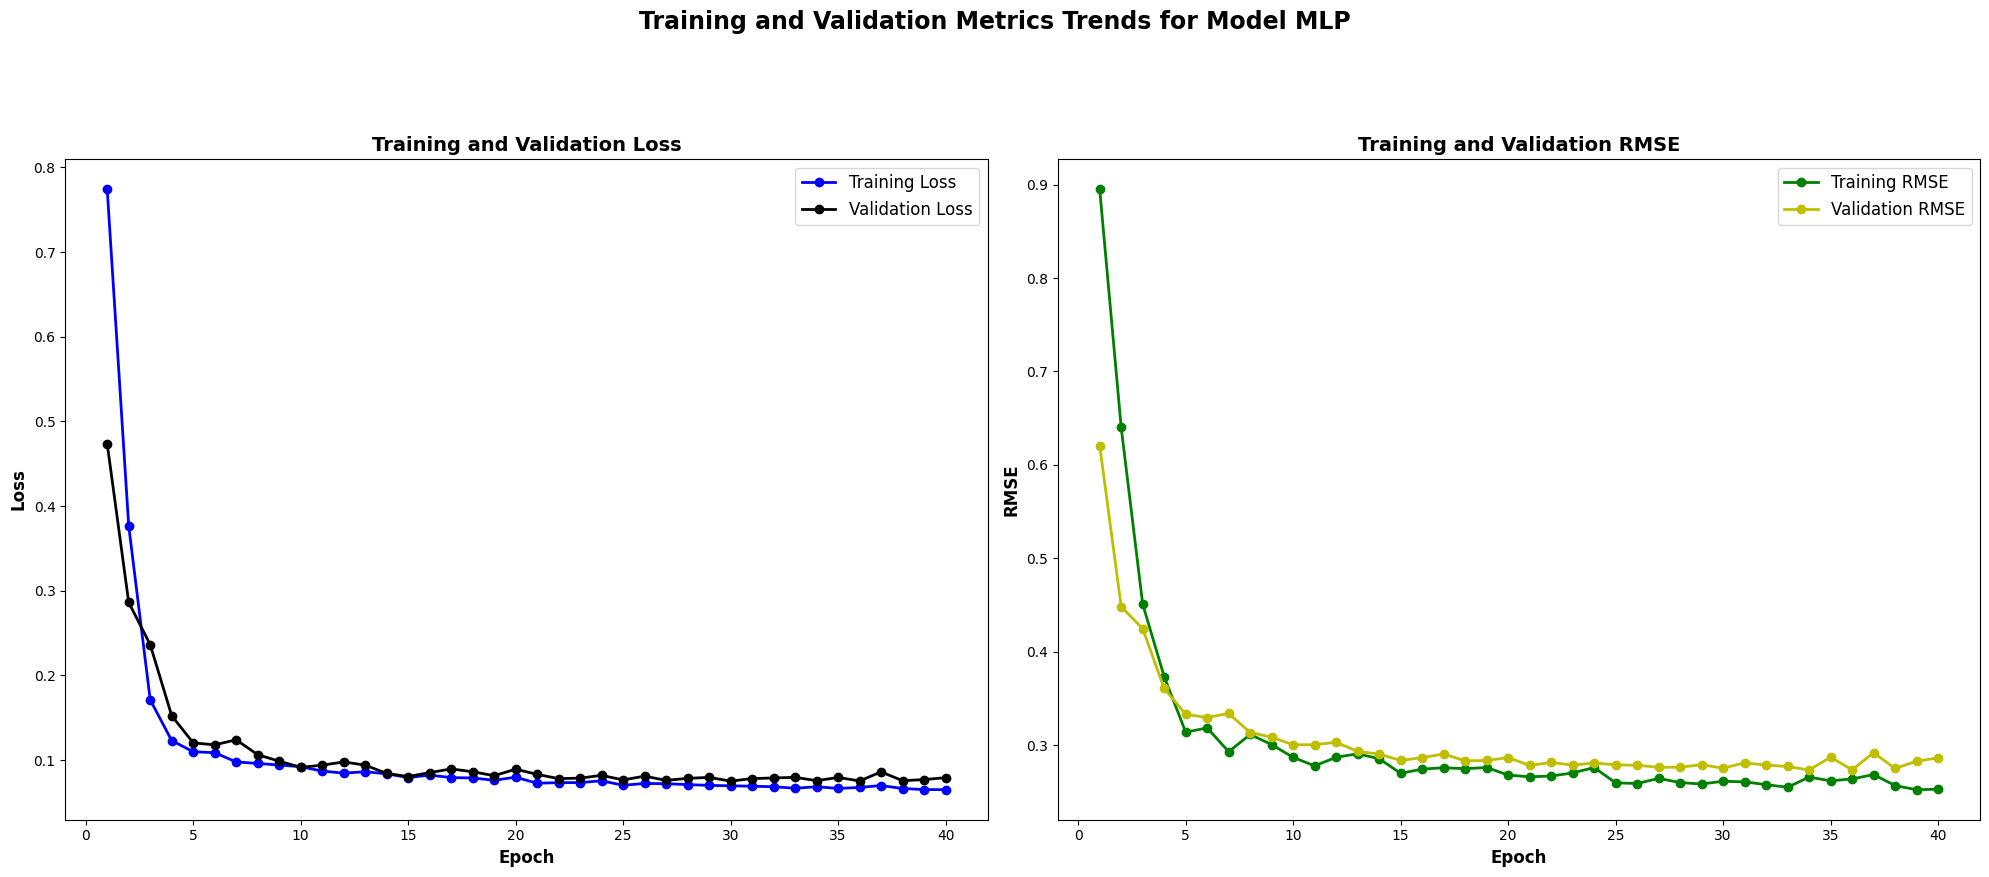

In [ ]:
training_history_curves_plot(mlp_metrics, "MLP")

In [ ]:
# function to perfom prediction
def predict(model, xtest_tensor):
    model.eval()
    predictions = model(Xtest_tensor).squeeze().cpu().detach().numpy()
    return predictions

mlp_predicted_values = predict(trained_mlp_model, Xtest_tensor)


In [ ]:

def regression_metrics(y_true, y_pred):
    """
    Calculates and returns regression performance metrics as a dictionary.

    Parameters:
    - y_true: Array-like, true target values.
    - y_pred: Array-like, predicted target values.

    Returns:
    - Dictionary with performance metrics: R2, MSE, RMSE, MAE.
    """
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)
    metrics = {
        "R2 Score": r2_score(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred)
    }
    return metrics

In [ ]:
def compare_predictions_with_ci(y_true, y_pred, model_name, ci_width=0.1):
    """
    Plots true vs predicted values with confidence intervals and a residual plot.

    Parameters:
    - y_true: Actual values.
    - y_pred: Predicted values.
    - model_name: Name of the model for labeling.
    - ci_width: Fraction of the predicted value range to use as the confidence interval width.
    """
    # inverse transform for logarithmic predictions if needed
    y_true = np.expm1(y_true)
    y_pred = np.expm1(y_pred)

    # calculate residuals
    residuals = y_true - y_pred

    # find confidence intervals
    ci_lower = y_pred - ci_width * y_pred
    ci_upper = y_pred + ci_width * y_pred

    # create a df for comparison
    compare_data = pd.DataFrame({
        'Actual': y_true,
        'Predicted': y_pred,
        'Residual': residuals,
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper
    }).reset_index(drop=True)

    plt.figure(figsize=(15, 7))

    # plot 1: True vs Predicted with Confidence Intervals
    plt.subplot(1, 2, 1)
    plt.plot(y_true, label="True Values", alpha=0.7, color='blue')
    plt.plot(y_pred, label="Predicted Values", alpha=0.7, color='orange')
    plt.fill_between(range(len(y_pred)), ci_lower, ci_upper, color='orange', alpha=0.2, label="Confidence Interval")
    plt.title(f"True vs Predicted Values for {model_name}", fontsize=16)
    plt.xlabel("Samples")
    plt.ylabel("Global Active Power")
    plt.legend()

    # plot 2: Residual Plot
    plt.subplot(1, 2, 2)
    plt.scatter(compare_data.index, compare_data['Residual'], alpha=0.7, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residual Plot for {model_name}", fontsize=16)
    plt.xlabel("Samples")
    plt.ylabel("Residuals")

    plt.tight_layout()
    plt.show()

In [ ]:

mlp_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),mlp_predicted_values),
    index= ["MLP Model"]
)

mlp_results

,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
MLP Model,-0.267015,0.308367,0.555308,0.419168


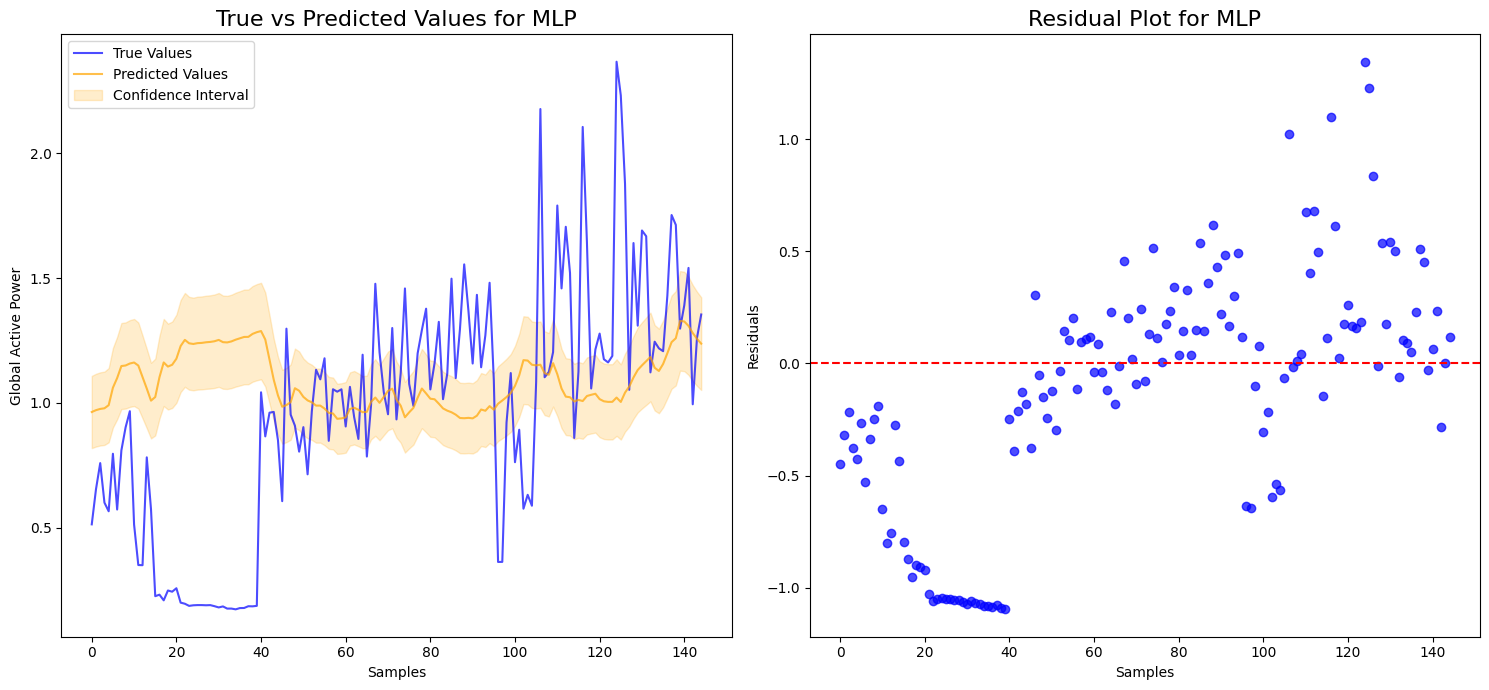

In [ ]:
# predictions comparison for MLP model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), mlp_predicted_values, "MLP", ci_width=0.15)


### 2. LSTM model training

In [ ]:
# # using LSTM
class CustomLSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(CustomLSTMNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # LSTM layer: Bidirectional
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob, bidirectional=True)

        # adding FC layers
        self.fc1 = nn.Linear(hidden_dim * 2, 128) #its *2 hence BIDERECTIONAL
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

        self.dropout = nn.Dropout(drop_prob)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        # initial  hidden state and cell state
        h0 = torch.zeros(self.n_layers * 2, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.n_layers * 2, x.size(0), self.hidden_dim).to(x.device)

        # forward pass through LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))

        # out = out[:, -1, :]
        out = out.mean(dim=1)  # Mean pooling
        #FC
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out#torch.nn.functional.softplus(out)


In [ ]:
# create  the model
lstm_model = CustomLSTMNet(input_dim, hidden_dim, output_dim, n_layers, drop_prob)
lstm_model.to(DEVICE)

CustomLSTMNet(
  (lstm): LSTM(8, 64, num_layers=8, batch_first=True, dropout=0.05, bidirectional=True)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
  (relu): ReLU()
  (tanh): Tanh()
)

In [ ]:
# Train LSTM and evaluate
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=LEARNING_RATE)

lstm_trained_model, lstm_metrics = train_and_evaluate(
    lstm_model, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)

Epoch 1/40 Train Loss: 0.24626 Train rmse: 0.49587  Val Loss 0.07102  val rmse 0.26663
Epoch 2/40 Train Loss: 0.05783 Train rmse: 0.24089  Val Loss 0.07282  val rmse 0.27754
Epoch 3/40 Train Loss: 0.04632 Train rmse: 0.21604  Val Loss 0.07587  val rmse 0.28476
Epoch 4/40 Train Loss: 0.04488 Train rmse: 0.21368  Val Loss 0.07537  val rmse 0.28366
Epoch 5/40 Train Loss: 0.04574 Train rmse: 0.21566  Val Loss 0.07117  val rmse 0.27334
Epoch 6/40 Train Loss: 0.04576 Train rmse: 0.21059  Val Loss 0.07007  val rmse 0.27001
Epoch 7/40 Train Loss: 0.04607 Train rmse: 0.21489  Val Loss 0.07258  val rmse 0.27712
Epoch 8/40 Train Loss: 0.04560 Train rmse: 0.21012  Val Loss 0.07162  val rmse 0.27467
Epoch 9/40 Train Loss: 0.04523 Train rmse: 0.21105  Val Loss 0.07104  val rmse 0.27313
Epoch 10/40 Train Loss: 0.04627 Train rmse: 0.21400  Val Loss 0.07036  val rmse 0.27116
Epoch 11/40 Train Loss: 0.04827 Train rmse: 0.22162  Val Loss 0.07407  val rmse 0.28089
Epoch 12/40 Train Loss: 0.04734 Train rms

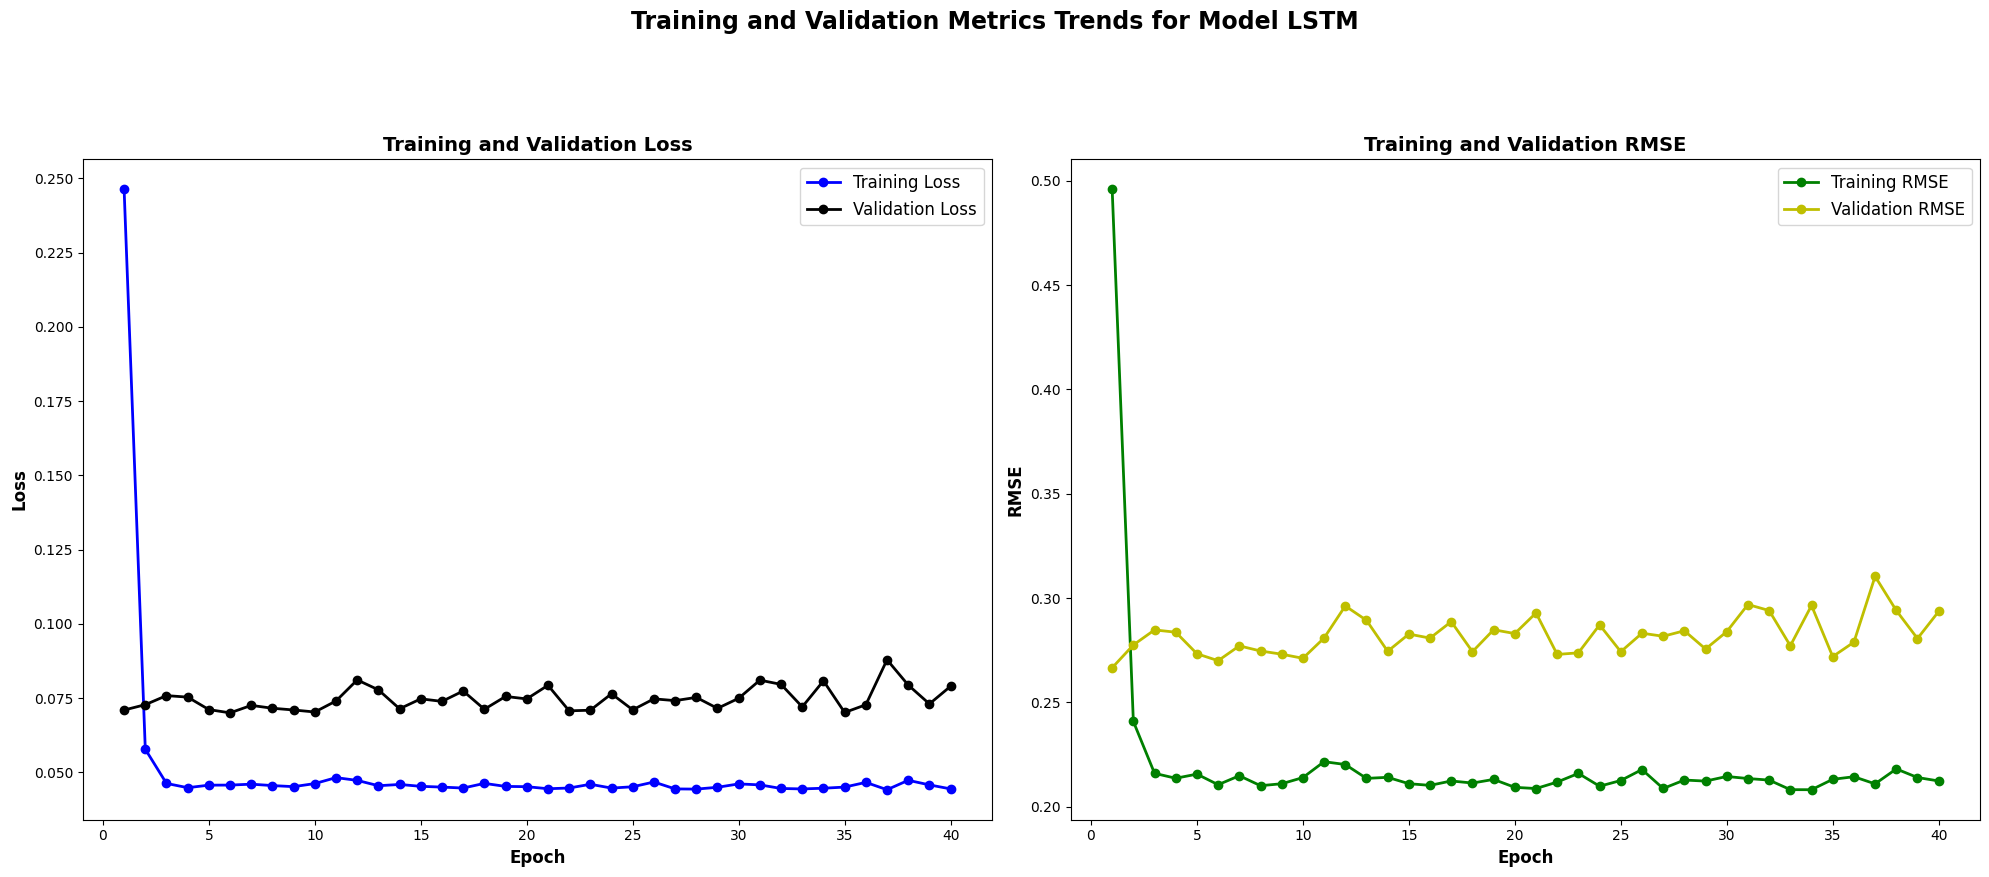

In [ ]:
training_history_curves_plot(lstm_metrics, "LSTM")

In [ ]:
lstm_predicted_values = predict(lstm_trained_model, Xtest_tensor)


In [ ]:

lstm_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),lstm_predicted_values),
    index= ["LSTM Model"]
)

lstm_results


,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
LSTM Model,-0.120422,0.272689,0.522197,0.398587


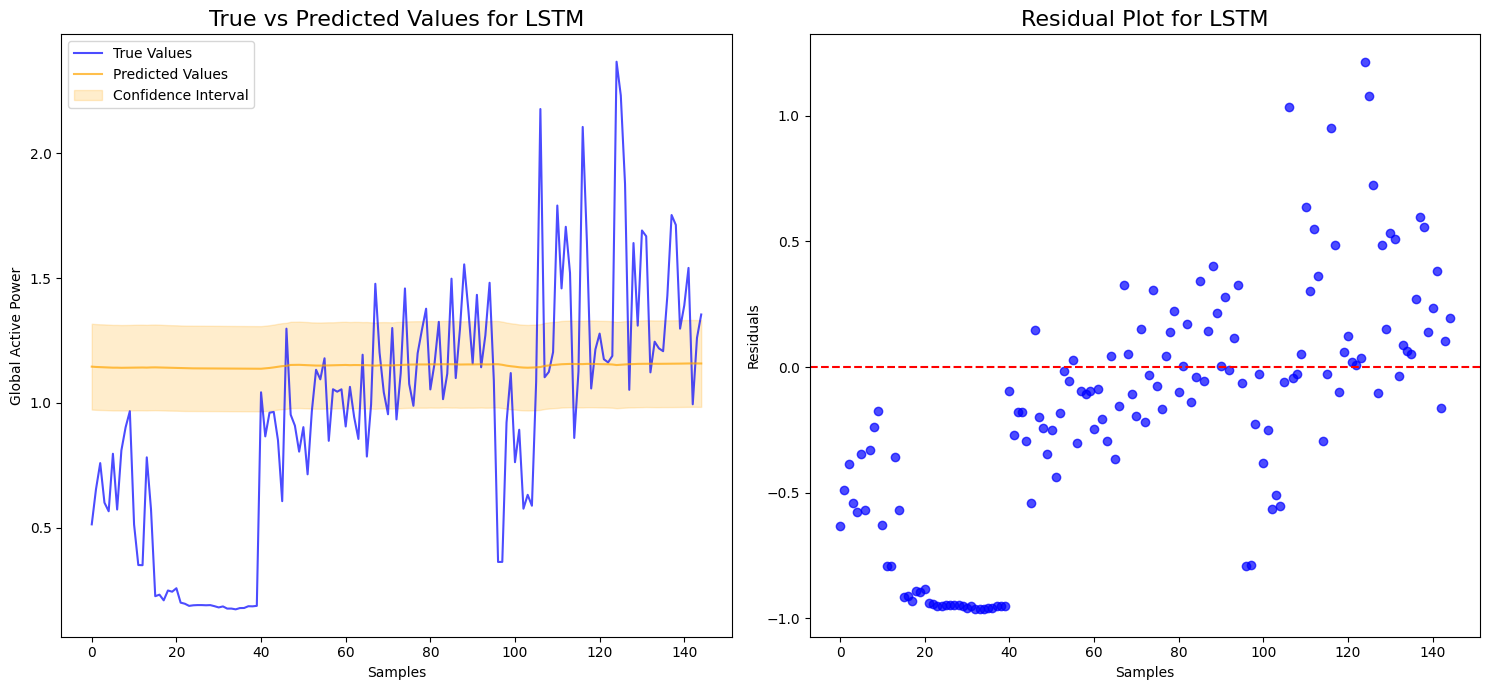

In [ ]:

# predictions comparison for LSTM model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), lstm_predicted_values, "LSTM", ci_width=0.15)


### 3. RNN model training

In [ ]:
# RNN
class RNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(RNNRegressor, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # RNN layer
        self.rnn = nn.RNN(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob, nonlinearity='tanh')

        # FC layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(x.device)
        out, hn = self.rnn(x, h0)
        out_ = out.mean(dim=1)  # Mean pooling
        out = self.fc(out_)
        return torch.nn.functional.softplus(out)


In [ ]:
# RNN model
rnn_model = RNNRegressor(input_dim, hidden_dim, output_dim, n_layers, drop_prob)
rnn_model.to(DEVICE)

RNNRegressor(
  (rnn): RNN(8, 64, num_layers=8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=LEARNING_RATE)
trained_rnn_model, rnn_metrics = train_and_evaluate(
    rnn_model, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)


Epoch 1/40 Train Loss: 0.04421 Train rmse: 0.21019  Val Loss 0.07106  val rmse 0.27297
Epoch 2/40 Train Loss: 0.04380 Train rmse: 0.20876  Val Loss 0.07139  val rmse 0.27572
Epoch 3/40 Train Loss: 0.04293 Train rmse: 0.20658  Val Loss 0.07701  val rmse 0.28819
Epoch 4/40 Train Loss: 0.04292 Train rmse: 0.20642  Val Loss 0.07116  val rmse 0.27427
Epoch 5/40 Train Loss: 0.04367 Train rmse: 0.20925  Val Loss 0.07302  val rmse 0.27875
Epoch 6/40 Train Loss: 0.04343 Train rmse: 0.20737  Val Loss 0.07112  val rmse 0.27518
Epoch 7/40 Train Loss: 0.04326 Train rmse: 0.20672  Val Loss 0.07284  val rmse 0.28060
Epoch 8/40 Train Loss: 0.04292 Train rmse: 0.20539  Val Loss 0.07414  val rmse 0.28293
Epoch 9/40 Train Loss: 0.04302 Train rmse: 0.20660  Val Loss 0.07462  val rmse 0.28250
Epoch 10/40 Train Loss: 0.04307 Train rmse: 0.20709  Val Loss 0.07503  val rmse 0.28411
Epoch 11/40 Train Loss: 0.04298 Train rmse: 0.20620  Val Loss 0.07365  val rmse 0.28097
Epoch 12/40 Train Loss: 0.04299 Train rms

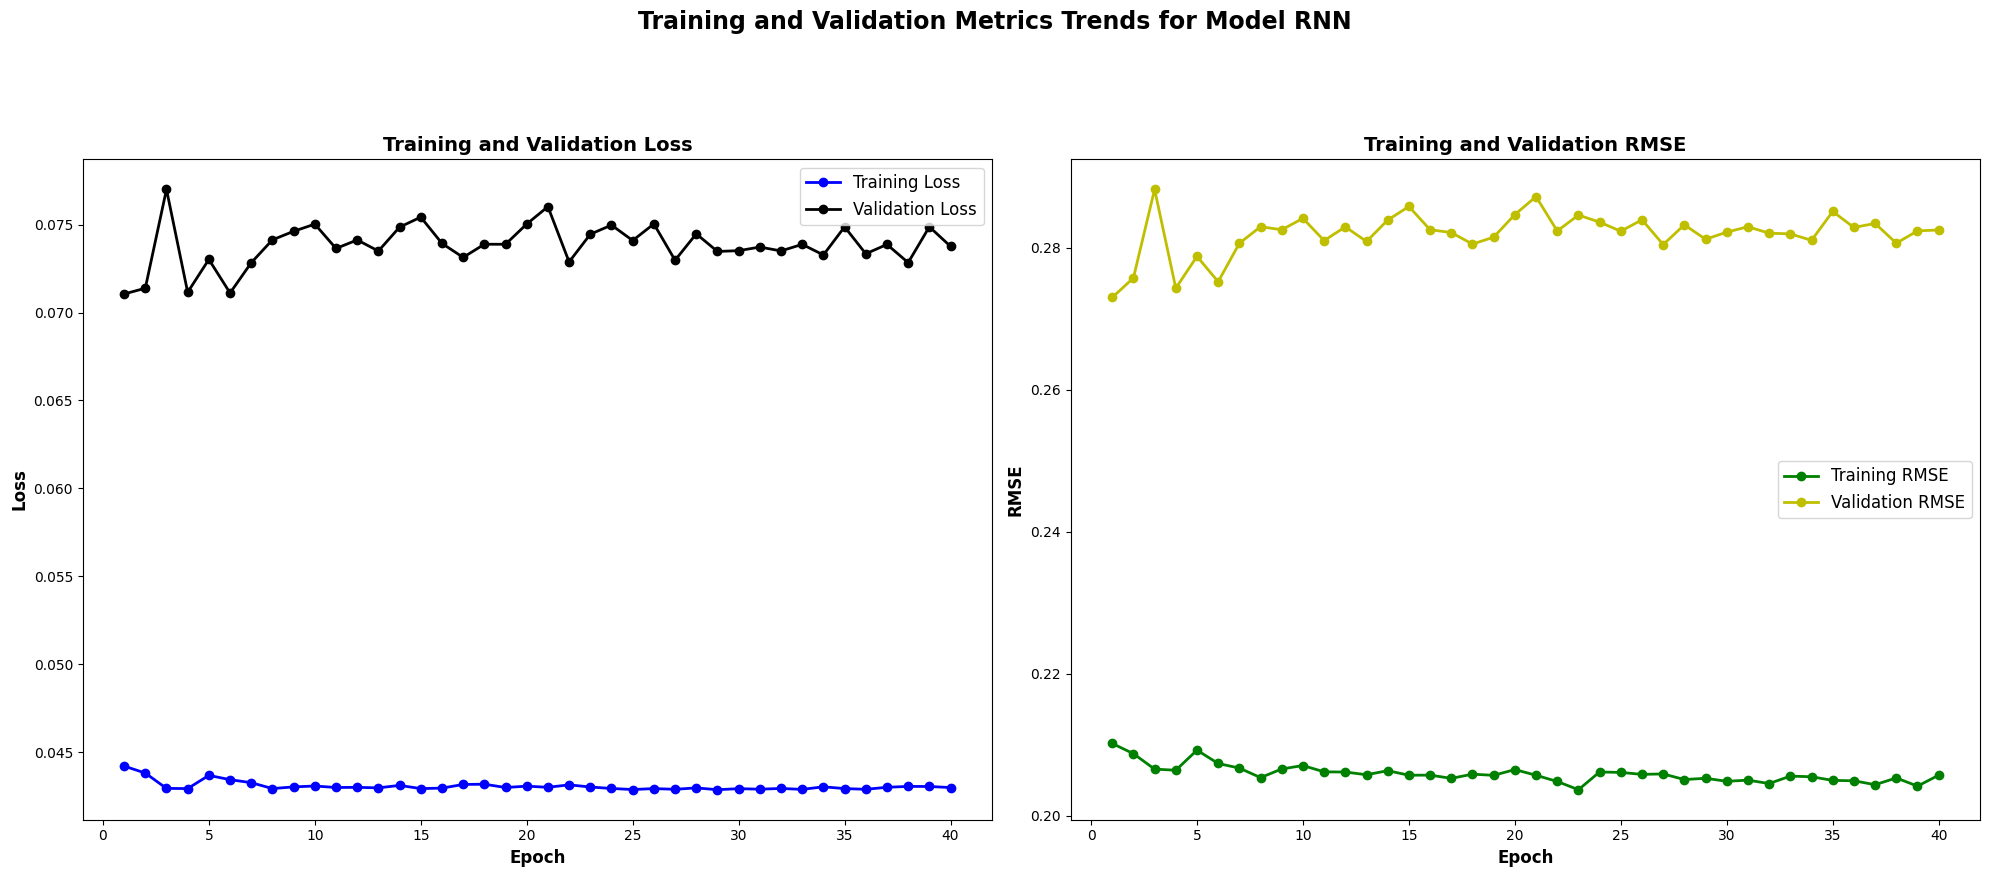

In [ ]:
training_history_curves_plot(rnn_metrics, "RNN")

In [ ]:
# get rnn preds
rnn_predicted_values = predict(trained_rnn_model, Xtest_tensor)


In [ ]:
rnn_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),rnn_predicted_values),
    index= ["RNN Model"]
)

rnn_results



,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
RNN Model,-0.042558,0.253739,0.503725,0.384176


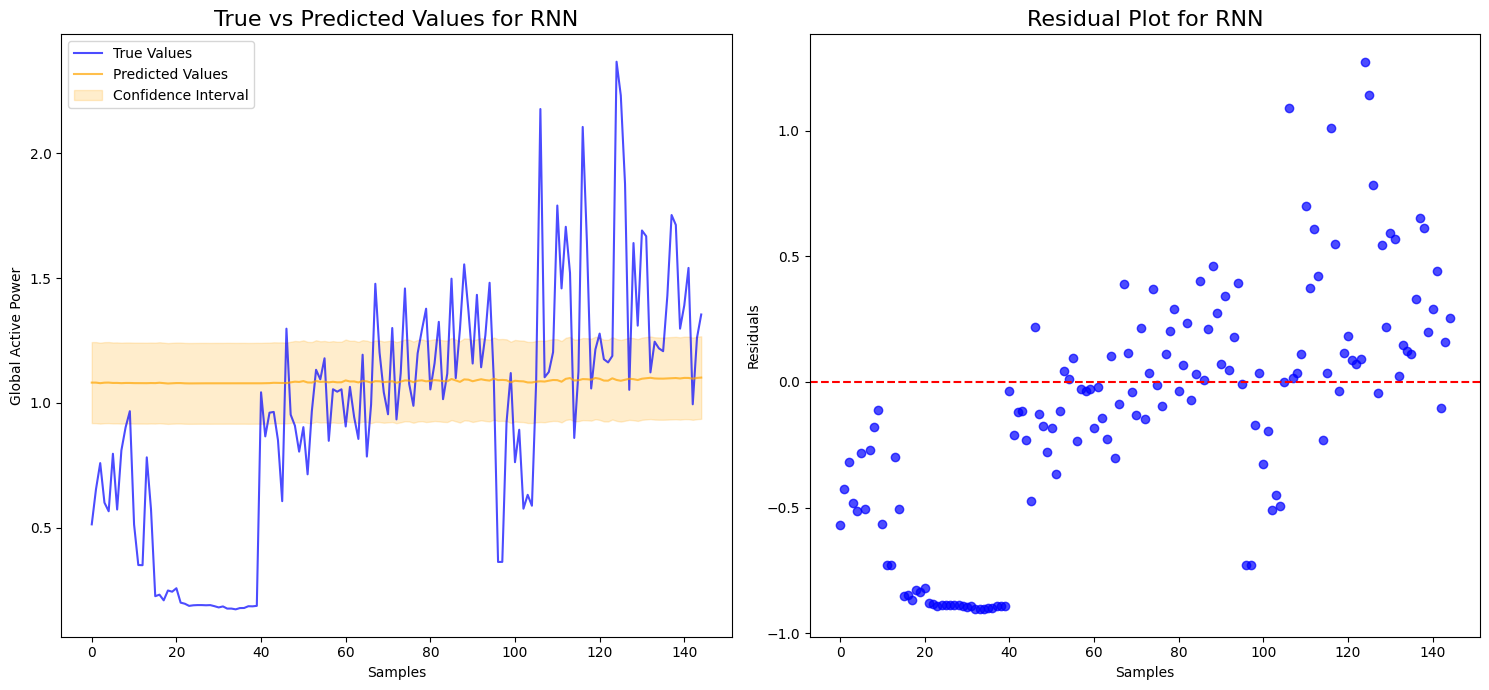

In [ ]:
# predictions comparison for rnn model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), rnn_predicted_values, "RNN", ci_width=0.15)


### 4. GRU model

In [ ]:
# GRU
class GRURegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.1):
        super(GRURegressor, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # GRU layer
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)

        # FC layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        #init hidden weights/state
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(x.device)
        # Forward pass through GRU
        out, hn = self.gru(x, h0)
        out_ = out.mean(dim=1)  # Mean pooling
        out = self.fc(out_)
        return out#torch.nn.functional.softplus(out)


In [ ]:
#GRU model
gru_model = GRURegressor(input_dim, hidden_dim, output_dim, n_layers, drop_prob)
gru_model.to(DEVICE)

GRURegressor(
  (gru): GRU(8, 64, num_layers=8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=LEARNING_RATE)
trained_gru_model, gru_metrics = train_and_evaluate(
    gru_model, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)


Epoch 1/40 Train Loss: 0.26591 Train rmse: 0.51558  Val Loss 0.09682  val rmse 0.32620
Epoch 2/40 Train Loss: 0.05265 Train rmse: 0.22896  Val Loss 0.09306  val rmse 0.31873
Epoch 3/40 Train Loss: 0.04542 Train rmse: 0.21276  Val Loss 0.07166  val rmse 0.27504
Epoch 4/40 Train Loss: 0.04376 Train rmse: 0.20871  Val Loss 0.07767  val rmse 0.28921
Epoch 5/40 Train Loss: 0.04345 Train rmse: 0.20816  Val Loss 0.07517  val rmse 0.28382
Epoch 6/40 Train Loss: 0.04321 Train rmse: 0.20746  Val Loss 0.07512  val rmse 0.28376
Epoch 7/40 Train Loss: 0.04337 Train rmse: 0.20761  Val Loss 0.07804  val rmse 0.29027
Epoch 8/40 Train Loss: 0.04331 Train rmse: 0.20706  Val Loss 0.07775  val rmse 0.28968
Epoch 9/40 Train Loss: 0.04315 Train rmse: 0.20743  Val Loss 0.07709  val rmse 0.28877
Epoch 10/40 Train Loss: 0.04357 Train rmse: 0.20779  Val Loss 0.07850  val rmse 0.29188
Epoch 11/40 Train Loss: 0.04336 Train rmse: 0.20765  Val Loss 0.07536  val rmse 0.28511
Epoch 12/40 Train Loss: 0.04345 Train rms

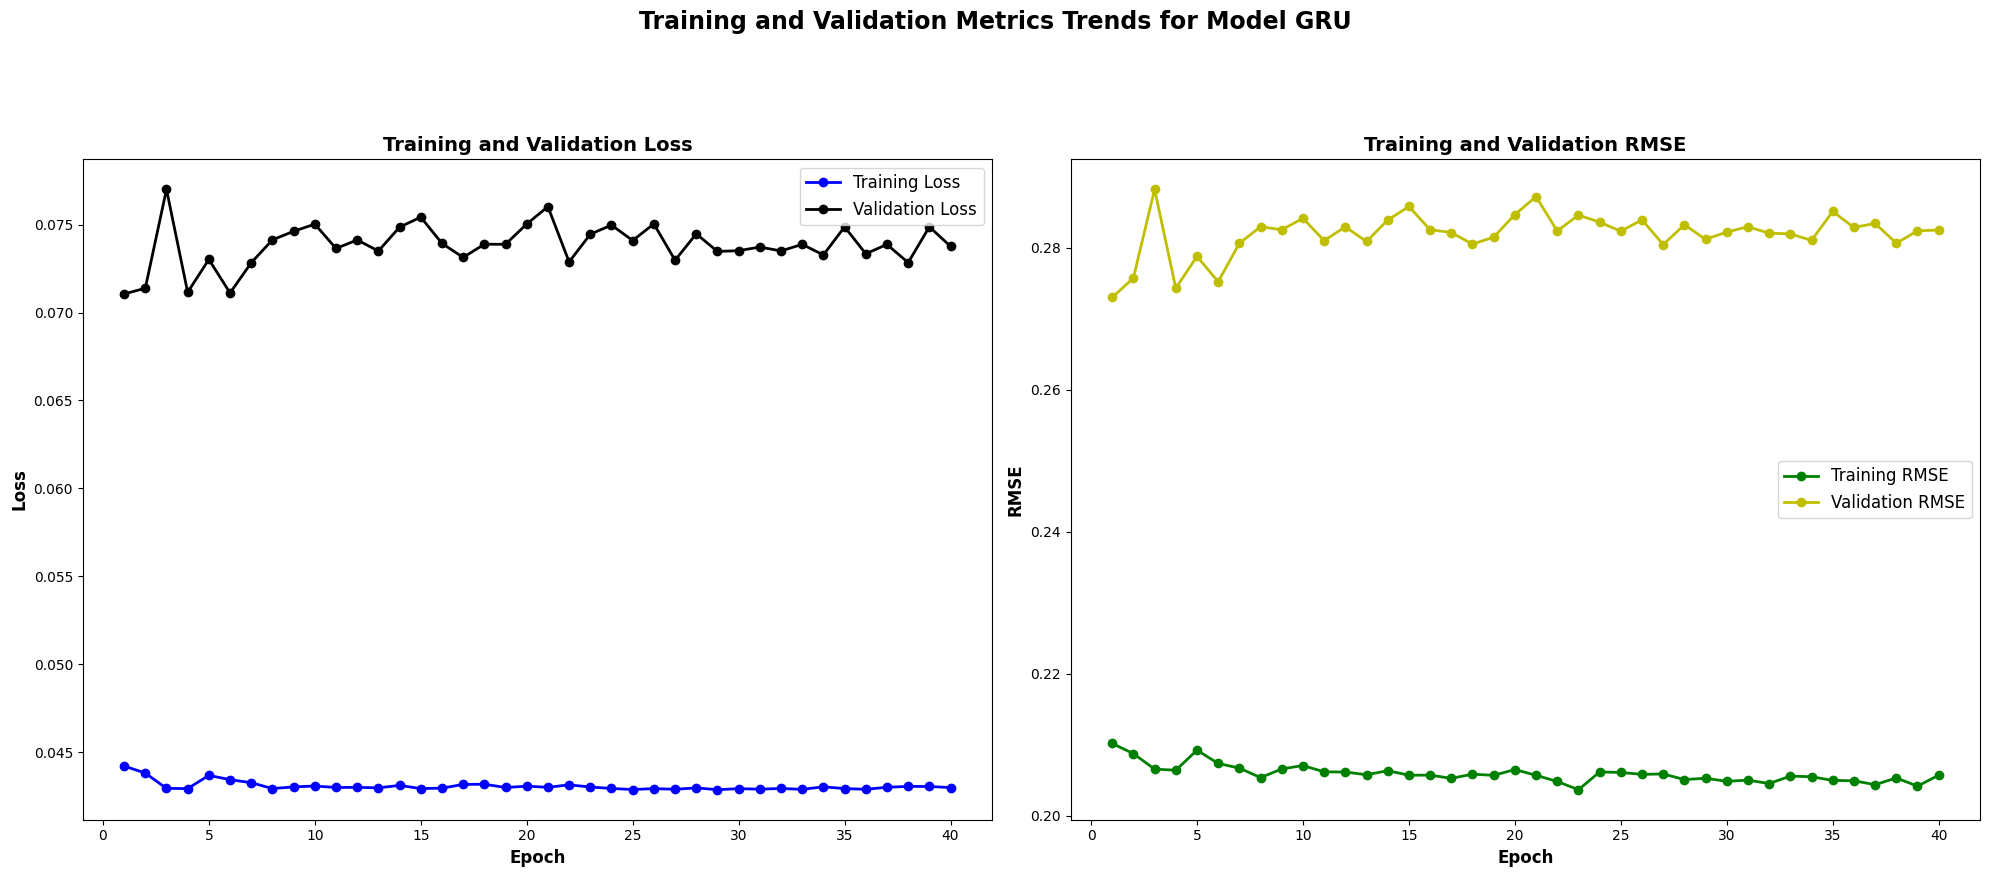

In [ ]:
training_history_curves_plot(rnn_metrics, "GRU")

In [ ]:
# predictions
gru_predicted_values = predict(trained_gru_model, Xtest_tensor)


In [ ]:
gru_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),gru_predicted_values),
    index= ["GRU Model"]
)

gru_results



,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
GRU Model,-0.139365,0.2773,0.526593,0.402311


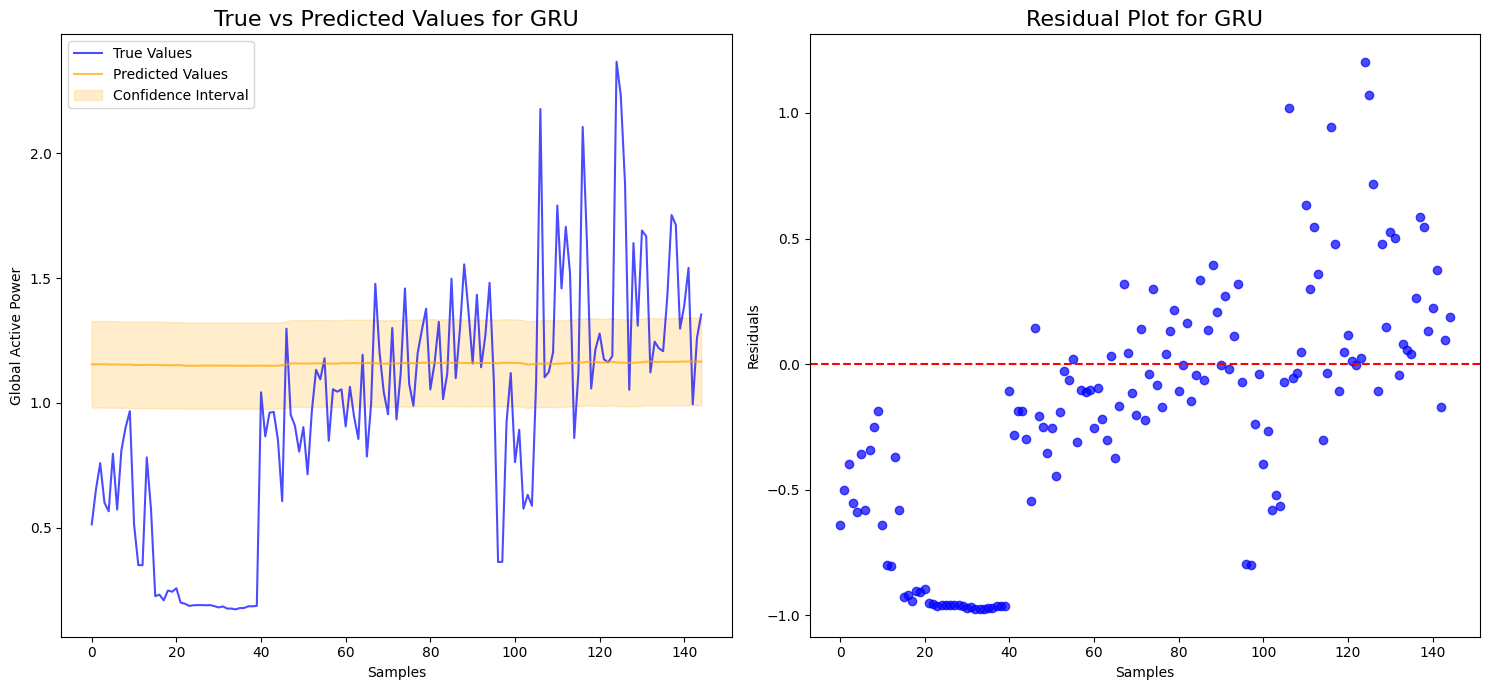

In [ ]:
# predictions comparison for gru model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), gru_predicted_values, "GRU", ci_width=0.15)


### 5. Hybrid Sequential Model

In [ ]:
# DO a hybrid of RNN, GRU and LSTM
class HybridSequentialNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(HybridSequentialNet, self).__init__()

        # LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        # GRU layer
        self.gru = nn.GRU(hidden_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        # RNN layer
        self.rnn = nn.RNN(hidden_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)

        # FC layers
        self.fc1 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc2 = nn.Linear(hidden_dim // 2, output_dim)

        # activate and dropout
        self.dropout = nn.Dropout(drop_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        # do LSTM
        h0_lstm = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0_lstm = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, (hn_lstm, cn_lstm) = self.lstm(x, (h0_lstm, c0_lstm))

        # do GRU
        h0_gru = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)
        out, hn_gru = self.gru(out, h0_gru)

        # do RNN
        h0_rnn = torch.zeros(self.rnn.num_layers, x.size(0), self.rnn.hidden_size).to(x.device)
        out, hn_rnn = self.rnn(out, h0_rnn)

        # FC layers
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)

        # ensure non-negative output
        # out = F.softplus(out)
        return out

In [ ]:
hybrid_model = HybridSequentialNet(input_dim, hidden_dim, output_dim, n_layers)
hybrid_model.to(DEVICE)

HybridSequentialNet(
  (lstm): LSTM(8, 64, num_layers=8, batch_first=True, dropout=0.2)
  (gru): GRU(64, 64, num_layers=8, batch_first=True, dropout=0.2)
  (rnn): RNN(64, 64, num_layers=8, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)

In [ ]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(hybrid_model.parameters(), lr=LEARNING_RATE)
hybrid_model, hybrid_metrics = train_and_evaluate(
    hybrid_model, train_loader, test_loader, optimizer, criterion, epochs=EPOCHS, device=DEVICE
)

Epoch 1/40 Train Loss: 0.29064 Train rmse: 0.53547  Val Loss 0.11953  val rmse 0.36193
Epoch 2/40 Train Loss: 0.09096 Train rmse: 0.29600  Val Loss 0.08696  val rmse 0.30735
Epoch 3/40 Train Loss: 0.07638 Train rmse: 0.28285  Val Loss 0.06985  val rmse 0.26910
Epoch 4/40 Train Loss: 0.06847 Train rmse: 0.26666  Val Loss 0.06960  val rmse 0.26796
Epoch 5/40 Train Loss: 0.06638 Train rmse: 0.25834  Val Loss 0.07425  val rmse 0.28107
Epoch 6/40 Train Loss: 0.06444 Train rmse: 0.25973  Val Loss 0.07063  val rmse 0.27175
Epoch 7/40 Train Loss: 0.06385 Train rmse: 0.25880  Val Loss 0.07067  val rmse 0.27189
Epoch 8/40 Train Loss: 0.06397 Train rmse: 0.25273  Val Loss 0.07370  val rmse 0.27978
Epoch 9/40 Train Loss: 0.06123 Train rmse: 0.24530  Val Loss 0.07188  val rmse 0.27524
Epoch 10/40 Train Loss: 0.06141 Train rmse: 0.24934  Val Loss 0.07292  val rmse 0.27790
Epoch 11/40 Train Loss: 0.06187 Train rmse: 0.23986  Val Loss 0.07269  val rmse 0.27732
Epoch 12/40 Train Loss: 0.06252 Train rms

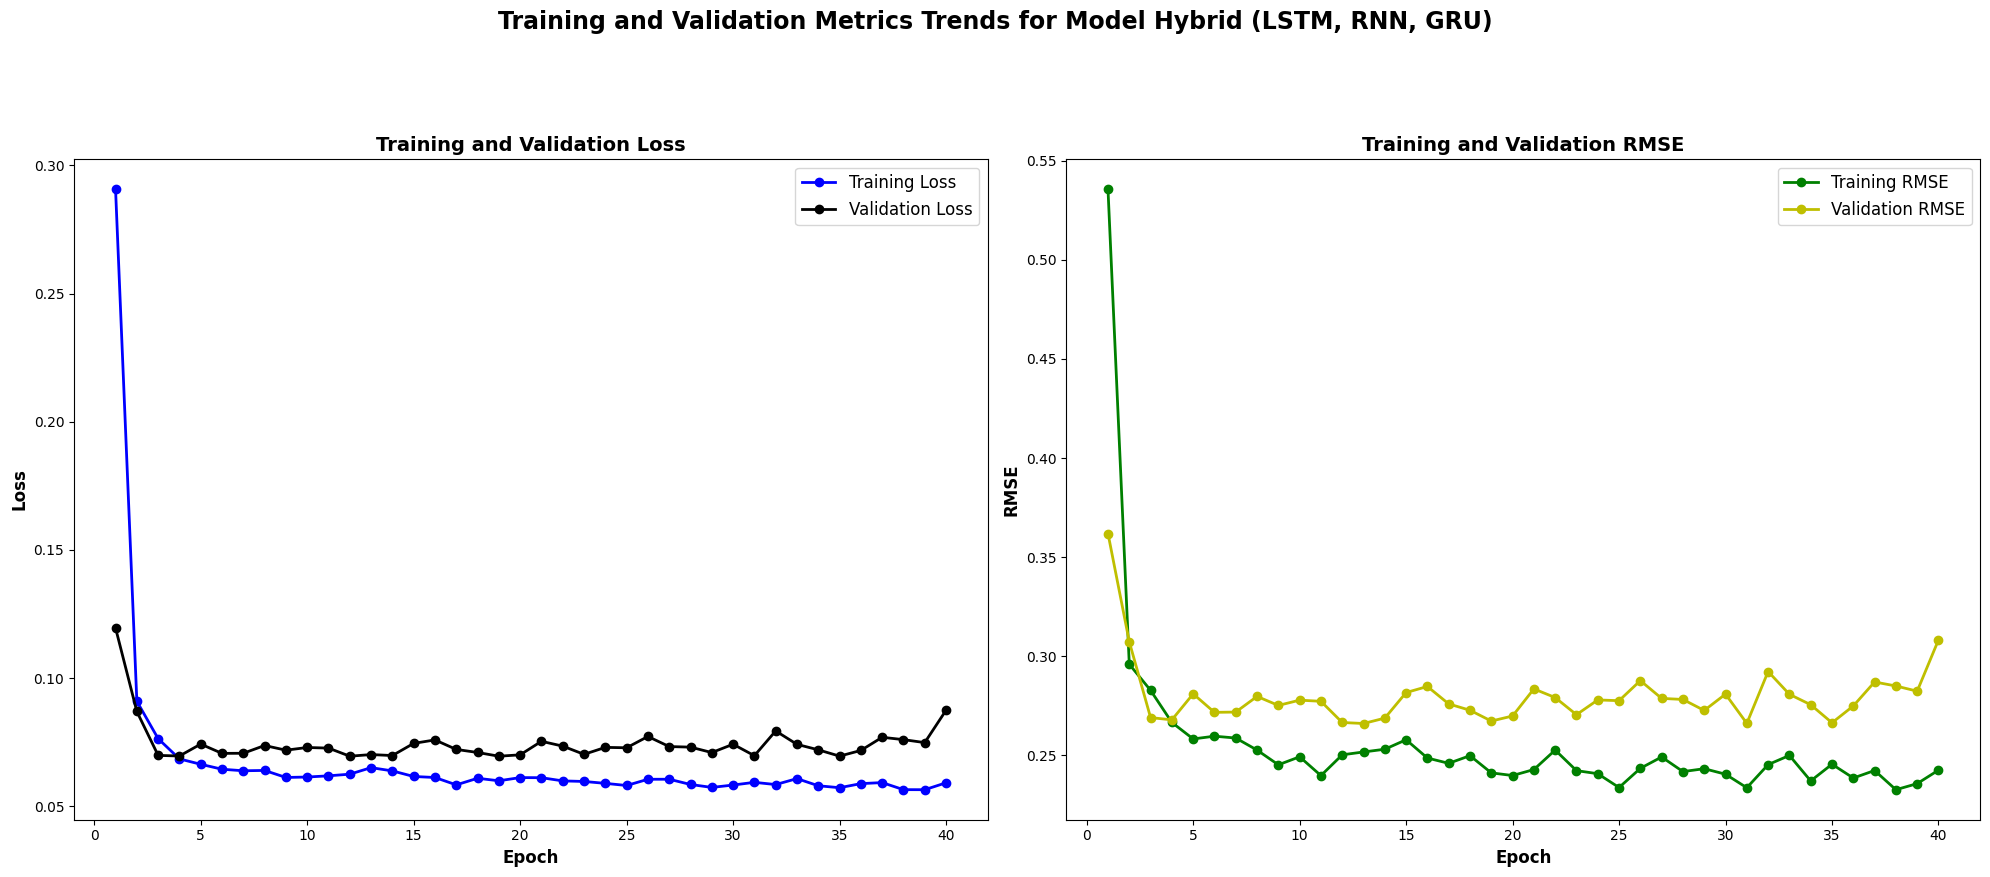

In [ ]:
training_history_curves_plot(hybrid_metrics, "Hybrid (LSTM, RNN, GRU)")

In [ ]:
# get prediciton for hybrid
hybrid_predicted_values = predict(hybrid_model, Xtest_tensor)

In [ ]:

hybrid_results = pd.DataFrame(
    regression_metrics(Ytest_tensor.squeeze().cpu().detach().numpy(),hybrid_predicted_values),
    index= ["Hybrid Sequential Model"]
)

hybrid_results


,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
Hybrid Sequential Model,-0.265629,0.30803,0.555004,0.428061


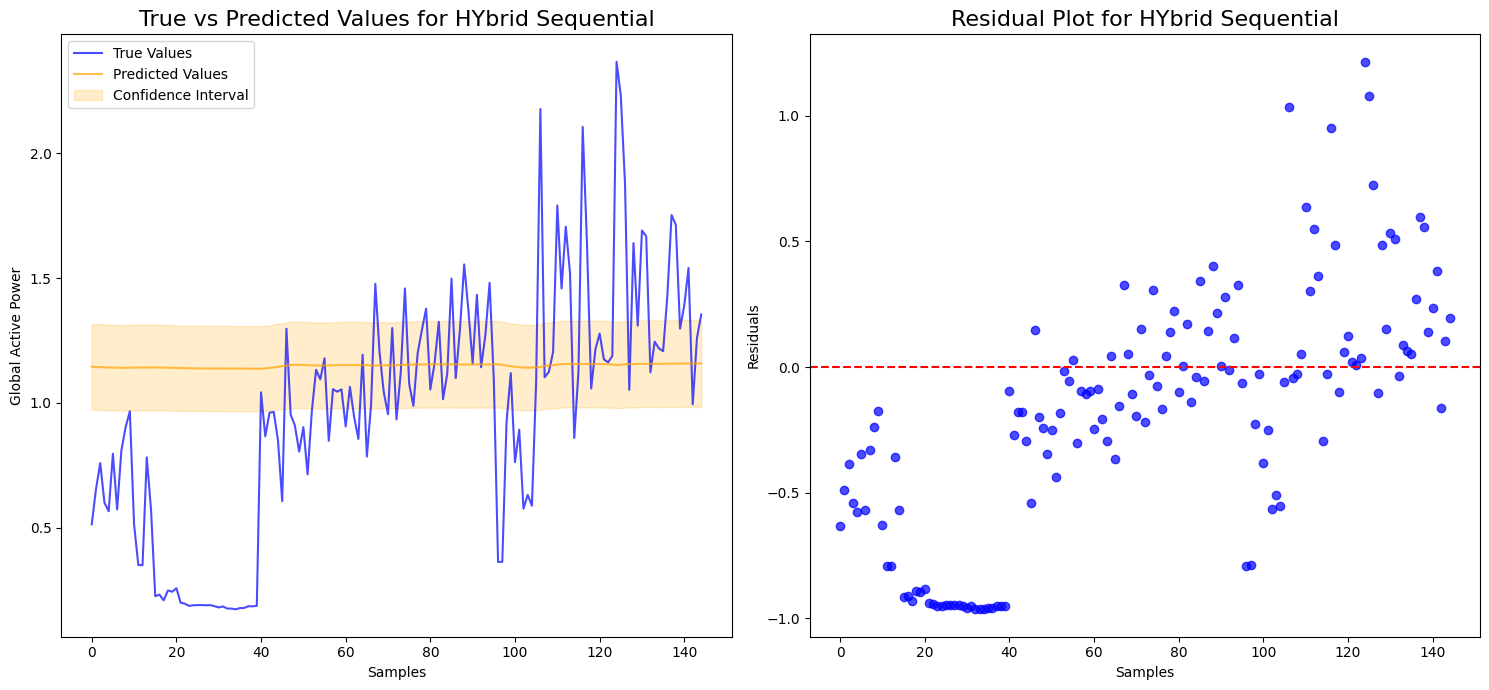

In [ ]:
# predictions comparison for hybrid model
compare_predictions_with_ci(Ytest_tensor.squeeze().cpu().detach().numpy(), lstm_predicted_values, "HYbrid Sequential", ci_width=0.15)


### Final Comparison

In [ ]:
final_perfomance = pd.concat(
    [lstm_results, rnn_results, gru_results, mlp_results, hybrid_results]
).sort_values(by="R2 Score", ascending=False)

In [ ]:
final_perfomance

,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
RNN Model,-0.042558,0.253739,0.503725,0.384176
LSTM Model,-0.120422,0.272689,0.522197,0.398587
GRU Model,-0.139365,0.277300,0.526593,0.402311
Hybrid Sequential Model,-0.265629,0.308030,0.555004,0.428061
MLP Model,-0.267015,0.308367,0.555308,0.419168


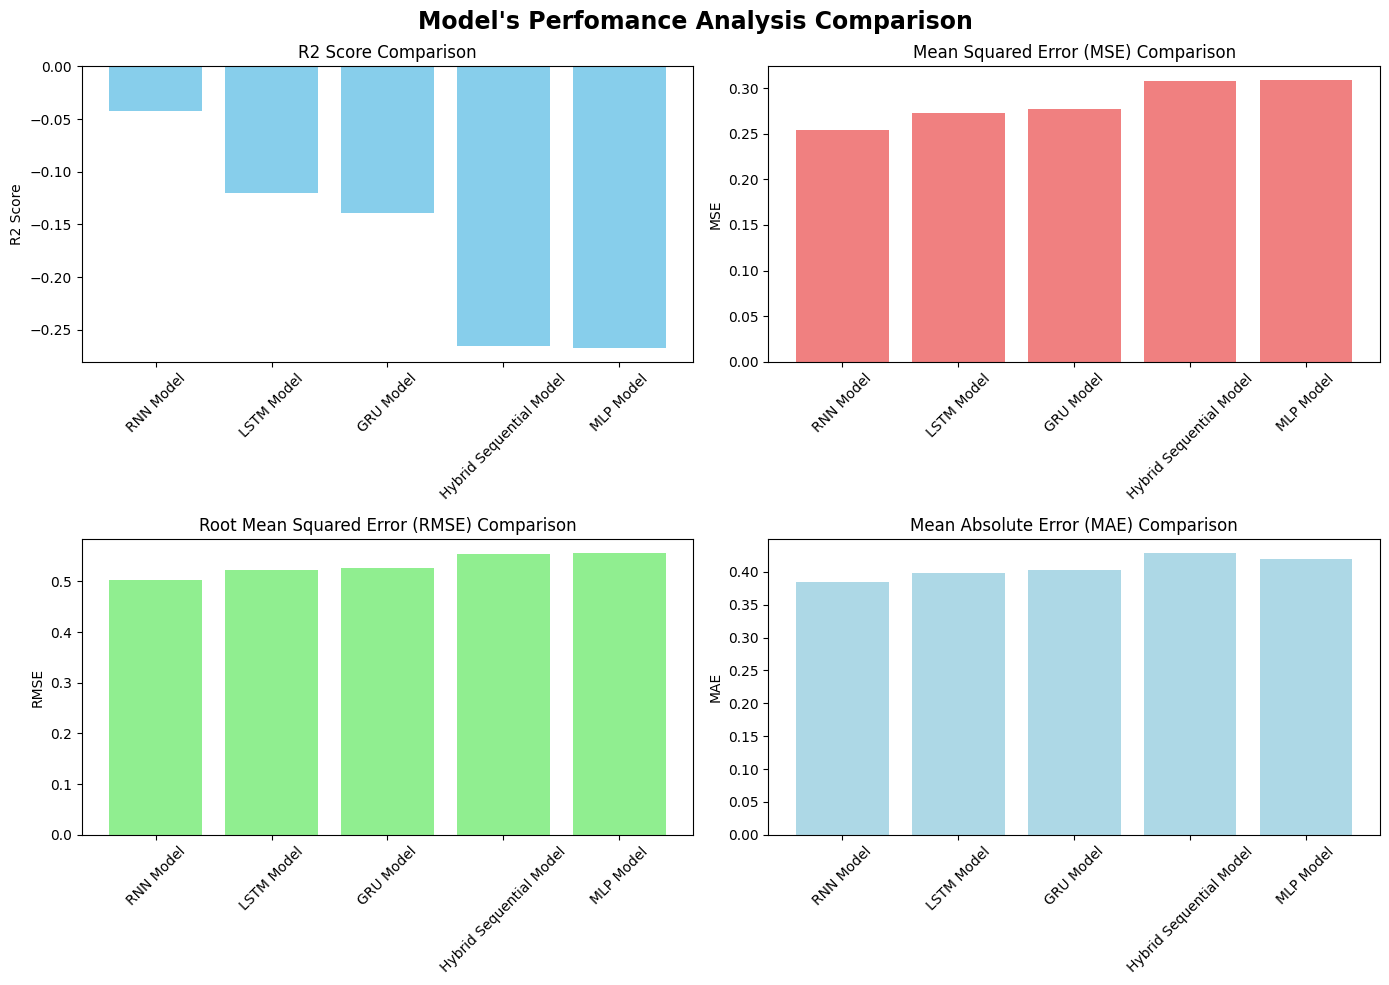

In [ ]:
# plotting the comparison
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# R2 Score plot
ax[0, 0].bar(final_perfomance.index, final_perfomance['R2 Score'], color='skyblue')
ax[0, 0].set_title('R2 Score Comparison')
ax[0, 0].set_ylabel('R2 Score')
ax[0, 0].set_xticklabels(final_perfomance.index, rotation=45)

# MSE plot
ax[0, 1].bar(final_perfomance.index, final_perfomance['Mean Squared Error (MSE)'], color='lightcoral')
ax[0, 1].set_title('Mean Squared Error (MSE) Comparison')
ax[0, 1].set_ylabel('MSE')
ax[0, 1].set_xticklabels(final_perfomance.index, rotation=45)

# RMSE plot
ax[1, 0].bar(final_perfomance.index, final_perfomance['Root Mean Squared Error (RMSE)'], color='lightgreen')
ax[1, 0].set_title('Root Mean Squared Error (RMSE) Comparison')
ax[1, 0].set_ylabel('RMSE')
ax[1, 0].set_xticklabels(final_perfomance.index, rotation=45)

# MAE plot
ax[1, 1].bar(final_perfomance.index, final_perfomance['Mean Absolute Error (MAE)'], color='lightblue')
ax[1, 1].set_title('Mean Absolute Error (MAE) Comparison')
ax[1, 1].set_ylabel('MAE')
ax[1, 1].set_xticklabels(final_perfomance.index, rotation=45)

plt.suptitle("Model's Perfomance Analysis Comparison", fontweight="bold", fontsize=17)

plt.tight_layout()
plt.show()
